# Job Market Intelligence System: Problem Statement

## 1. Context & Problem

The current job market is fragmented and opaque, creating significant inefficiencies for three key stakeholder groups:

- **Job Seekers** face information overload, skill uncertainty, and lack of salary transparency.
- **HR Professionals & Recruiters** struggle with competitive hiring, compensation benchmarking, and identifying skill gaps.
- **Educational Institutions & Career Counselors** operate with outdated curriculum and lack real-time market data for guidance.

**Core Problem:** There is no unified, data-driven system that transforms raw job posting data into actionable, real-time insights for all stakeholders.

## 2. Project Goal

To develop a **Job Market Intelligence System** that analyzes job posting data to generate clear, actionable insights on skill demand, geographic opportunity, salary benchmarks, and market trends.

## 3. Key Objectives

1.  **Skill Demand Analysis:** Identify trending and declining technical skills.
2.  **Geographic Opportunity Mapping:** Visualize job distribution and hotspots.
3.  **Salary Benchmarking:** Estimate compensation by role, experience, and location.
4.  **Job Classification & Trend Identification:** Categorize postings and spot emerging roles.

## 4. Primary Business Questions

- **For Job Seekers:** "What skills should I learn, where are the jobs, and what salary can I expect?"
- **For HR/Recruiters:** "How competitive is the market, and are our offers aligned?"
- **For Educators:** "Which skills and emerging roles should we teach for?"

## 5. Success Metrics

- **Technical:** >80% classification accuracy; <$15k MAE for salary prediction.
- **Business:** Delivery of actionable insights, clear visualizations, and identifiable market patterns to all stakeholder groups.

## 6. Project Scope

**In-Scope (Initial Focus):**
- Analysis of provided job posting datasets.
- Focus on English-language technical/professional roles.
- Skills extraction and trend analysis from job descriptions.

**Value Delivered:**
- **Job Seekers:** Reduced search time, clearer career paths.
- **HR Professionals:** Competitive intelligence, optimized recruitment.
- **Educators:** Data-driven curriculum alignment and career guidance.

# Data Exploration and Quality Assessment

Let us now explore our dataset and understand its structure, quality and potential for our project.

## Data Loading and Inspection
We will now load the data andexamine its basic properties.

In [2]:
# STANDARD LIBRARIES
import os                          # Interacting with the operating system (file paths, directories)
import math                        # Math functions (e.g., sqrt)
import pickle                      # Save/load Python objects
import joblib                      # Save/load trained models efficiently

# DATA MANIPULATION & NUMERICAL COMPUTATION
import pandas as pd                # Data loading, cleaning, and manipulation
import numpy as np                 # Numerical operations and array manipulation

# VISUALIZATION
import matplotlib.pyplot as plt    # General-purpose plotting
import seaborn as sns              # Statistical data visualization

# STATISTICS
from scipy import stats             # Statistical functions, e.g., z-score, t-tests
from scipy.stats import entropy     # Measure of information content (e.g., Shannon entropy)

# MACHINE LEARNING
import xgboost as xgb               # XGBoost for gradient boosting models
from sklearn.model_selection import (
    train_test_split,              # Split data into train/test sets
    StratifiedKFold,               # Cross-validation preserving class distribution
    GridSearchCV                   # Hyperparameter tuning
)
from sklearn.ensemble import (
    RandomForestClassifier,        # Random Forest classifier
    VotingClassifier,              # Combine multiple models via voting
    GradientBoostingRegressor      # Gradient boosting for regression
)
from sklearn.linear_model import LogisticRegression  # Logistic regression classifier
from sklearn.metrics import (
    accuracy_score,
    fbeta_score,                   # F-beta score for classification performance
    precision_recall_curve,        # Precision-recall curve
    classification_report,         # Detailed classification metrics
    mean_squared_error,            # Regression metric
    mean_absolute_error,           # Regression metric
    auc,                           # Area under curve (ROC or PR)
    confusion_matrix,              # True vs predicted labels summary
    roc_curve,                     # Compute ROC curve for binary classification
    make_scorer,                   # Create custom scoring function for model evaluation
    precision_score,               # Precision metric
    recall_score,                  # Recall metric
    f1_score
)
from sklearn.preprocessing import StandardScaler       # Feature scaling
from sklearn.cluster import KMeans                     # Clustering algorithm
from sklearn.decomposition import PCA                  # Principal Component Analysis (dimensionality reduction)
from sklearn.inspection import permutation_importance  # Measure feature importance via performance drop
from sklearn.calibration import CalibratedClassifierCV # Fixes overconfident probabilities

# HANDLING IMBALANCED DATA
from imblearn.over_sampling import SMOTE          # Synthetic oversampling for minority class
from imblearn.pipeline import Pipeline            # Pipelines compatible with imbalanced-learn

# MISCELLANEOUS SETTINGS
pd.set_option("display.max_columns", None)       # Display all columns in DataFrame

import warnings
warnings.filterwarnings('ignore')                # Suppress warnings for cleaner output

sns.set_theme(style="whitegrid", context="talk", font_scale=0.9)
plt.rcParams["figure.figsize"] = (12, 5)  # Default figure size

- We got an error when trying to read in the dataset due to the unique encoding of the data inside the dataset. Therefore, we had to employ some encoding to debug the dataset and make it readable by the pandas library.

In [3]:
#Load the data
ob_Posting_df = pd.read_csv("Job_Posting_data.csv")
Job_Posting_df.head()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd0 in position 1736: invalid continuation byte

In [ ]:
encodings_to_try = ['ISO-8859-1', 'cp1252', 'latin1', 'windows-1252', 'utf-8-sig', 'mac_roman']

print("Trying different encodings...")
for encoding in encodings_to_try:
    try:
        Job_Posting_df = pd.read_csv("Job_Posting_data.csv", encoding=encoding)
        print(f"SUCCESS with {encoding} encoding!")
        print(f"   Shape: {Job_Posting_df.shape}")
        print(f"   Columns: {len(Job_Posting_df.columns)}")
        print(f"\nFirst 3 rows:")
        print(Job_Posting_df.head(3))
        print("\nColumn names:")
        for i, col in enumerate(Job_Posting_df.columns, 1):
            print(f"  {i:2}. {col}")
        break
    except UnicodeDecodeError as e:
        print(f"Failed with {encoding}: {str(e)[:50]}...")
    except Exception as e:
        print(f"Failed with {encoding}: {type(e).__name__}")

In [ ]:
Job_Posting_df.head()

In [ ]:
Job_Posting_df.shape

In [ ]:
Job_Posting_df.info()

- We observed that there were 21 columns present in the dataset and 9919 rows. We also observed that one column, **Ticker** was a null column which we later dropped while doing the data preparaton.
- We then proceeded to doing EDA.

# Exploratory Data Analysis

- We started by doing an overview of the dataset.

In [ ]:

# Display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 50)

print("DATASET OVERVIEW")
print("-"*20)
print(f"Total Records: {Job_Posting_df.shape[0]:,}")
print(f"Total Features: {Job_Posting_df.shape[1]}")
print(f"Data loaded: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

Columns Summary

In [ ]:

print("COLUMN SUMMARY")
print("-"*20)
print("\nIndex | Column Name                    | Non-Null | Dtype")
print("-"*60)

for i, col in enumerate(Job_Posting_df.columns, 1):
    non_null = Job_Posting_df[col].notnull().sum()
    percentage = (non_null / len(Job_Posting_df)) * 100
    dtype = Job_Posting_df[col].dtype
    print(f"{i:5d} | {col:30} | {non_null:7,d} ({percentage:5.1f}%) | {dtype}")

As you can see, our dataset contains 19 columns, one which contains numerical values and the other which are text columns. We will now proceed on data exploration and quality analysis.

 Data Exploration and Quality Assessment

In [ ]:
# Display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 50)

print("DATASET OVERVIEW")
print("-"*20)
print(f"Total Records: {Job_Posting_df.shape[0]:,}")
print(f"Total Features: {Job_Posting_df.shape[1]}")
print(f"Data loaded: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

- Let's now do a column summary;

In [ ]:
print("COLUMN SUMMARY")
print("-"*20)
print("\nIndex | Column Name                    | Non-Null | Dtype")
print("-"*60)

for i, col in enumerate(Job_Posting_df.columns, 1):
    non_null = Job_Posting_df[col].notnull().sum()
    percentage = (non_null / len(Job_Posting_df)) * 100
    dtype = Job_Posting_df[col].dtype
    print(f"{i:5d} | {col:30} | {non_null:7,d} ({percentage:5.1f}%) | {dtype}")

- Now that we have done a summary of the columns, let's go ahead and have a look at the number of missing values, since as you can see, the summary we have done above shows us the percentage of non-null values in the respective columns.

In [ ]:
# Missing Values Analysis
print("MISSING VALUES ANALYSIS - TOP 10 WORST COLUMNS")
print("-"*50)

# Calculate missing values
missing_data = []
for col in Job_Posting_df.columns:
    non_null = Job_Posting_df[col].notnull().sum()
    null_count = Job_Posting_df[col].isnull().sum()
    null_pct = (null_count / len(Job_Posting_df)) * 100
    missing_data.append({
        'Column': col,
        'Non-Null': non_null,
        'Null Count': null_count,
        'Null %': null_pct,
        'Dtype': Job_Posting_df[col].dtype
    })

missing_df = pd.DataFrame(missing_data)
missing_df = missing_df.sort_values('Null %', ascending=False)

# Display top 10
print(missing_df.head(10).to_string(index=False))

In [ ]:
print("MISSING DATA CATEGORIZATION")
print("-"*50)

# Categorize columns by missing percentage
def categorize_missing(pct):
    if pct == 0:
        return 'Complete (0%)'
    elif pct < 5:
        return 'Good (<5%)'
    elif pct < 20:
        return 'Moderate (5-20%)'
    elif pct < 50:
        return 'High (20-50%)'
    elif pct < 100:
        return 'Very High (50-99%)'
    else:
        return 'Completely Missing (100%)'

missing_df['Category'] = missing_df['Null %'].apply(categorize_missing)
category_counts = missing_df['Category'].value_counts()

for category, count in category_counts.items():
    cols_in_category = missing_df[missing_df['Category'] == category]['Column'].tolist()
    print(f"\n{category:30}: {count:2d} columns")
    if len(cols_in_category) <= 5:
        print(f"   {', '.join(cols_in_category)}")
    else:
        print(f"   {', '.join(cols_in_category[:3])}, ... and {len(cols_in_category)-3} more")

- Now that we have an idea of the missing values and their percentages in the dataset, we can now see that the columns, **Ticker** and **Salary**, can be dropped from our dataset. But instead of going with this approach of dropping columns, let's do a critical column analysis to determine which columns are the most important for our analysis.

In [ ]:
# 2.3 Critical Column Assessment

print("CRITICAL COLUMNS ASSESSMENT")
print("-"*50)

critical_columns = {
    'Job Opening Title': 'Primary identifier - ESSENTIAL',
    'Description': 'Contains skills/requirements - ESSENTIAL',
    'Category': 'Job classification - IMPORTANT',
    'Location': 'Geographic info - IMPORTANT',
    'Seniority': 'Experience level - IMPORTANT',
    'Salary': 'Compensation - DESIRABLE but limited',
    'Contract Types': 'Job type - DESIRABLE',
    'Job Status': 'Open/Closed status - DESIRABLE'
}

print("\nColumn                  | Non-Null |   %   | Status")
print("-"*60)

for col, importance in critical_columns.items():
    if col in Job_Posting_df.columns:
        non_null = Job_Posting_df[col].notnull().sum()
        pct = (non_null / len(Job_Posting_df)) * 100
        
        if pct > 90:
            status = "Excellent"
        elif pct > 70:
            status = "Acceptable"
        elif pct > 50:
            status = "Concerning"
        else:
            status = "Critical Issue"
        
        print(f"{col:23} | {non_null:8,d} | {pct:5.1f}% | {status}")
        print(f"                      {importance}")
    else:
        print(f"{col:23} | {'NOT FOUND':^8} | {'N/A':^5} | ❌ Missing Column")

- We can now see the most important columns which are desirable for our project and therefore we will go with this columns. Since most of our columns are text-based columns and they are categorical, we will have to develop key statistics which we will set for our categorical columns so that we can proceed with our data analysis.

In [ ]:
## 2.4 Key Statistics for Numeric/Categorical Columns
print("CATEGORICAL COLUMNS ANALYSIS")
print("-"*50)

categorical_cols = ['Category', 'Seniority', 'Job Status', 'Job Language', 'Contract Types']

for col in categorical_cols:
    if col in Job_Posting_df.columns and Job_Posting_df[col].notnull().sum() > 0:
        print(f"\n{col}:")
        print("-"*40)
        
        # Count unique values
        unique_count = Job_Posting_df[col].nunique()
        non_null = Job_Posting_df[col].notnull().sum()
        
        print(f"Non-null values: {non_null:,}/{len(Job_Posting_df):,} ({(non_null/len(Job_Posting_df))*100:.1f}%)")
        print(f"Unique values: {unique_count}")
        
        # Show top values
        value_counts = Job_Posting_df[col].value_counts(dropna=False).head(10)
        print("\nTop 10 values:")
        for value, count in value_counts.items():
            pct = (count / len(Job_Posting_df)) * 100
            if pd.isna(value):
                print(f"  NaN: {count:5,d} ({pct:5.1f}%)")
            else:
                # Truncate long values
                display_value = str(value)[:50] + "..." if len(str(value)) > 50 else str(value)
                print(f"  {display_value:50}: {count:5,d} ({pct:5.1f}%)")

- From this analysis, we can see that for the six categorical columns; i.e. , **Category**, **Seniority**, **Job Status**, **Job Language** and **Contract Types**, we have the various top values for each of these respective columns which shows us the Job Posting behaviour and nature at hand.

- Our dataset also happens to contain some columns which contains data in JSON format; i.e., ***Location Data*** and ***Salary Data***, hence the need to import the ***json*** library. Let's do a preview of the JSON columns.

In [ ]:
# 2.5 JSON Columns Preview

print("JSON COLUMNS ANALYSIS")
print("-"*30)

json_columns = ['Location Data', 'Salary Data']

for json_col in json_columns:
    if json_col in Job_Posting_df.columns:
        print(f"\n{json_col}:")
        print("-"*40)
        
        non_null_count = Job_Posting_df[json_col].notnull().sum()
        print(f"Non-null values: {non_null_count:,}/{len(Job_Posting_df):,} ({(non_null_count/len(Job_Posting_df))*100:.1f}%)")
        
        # Sample and parse JSON
        samples = Job_Posting_df[json_col].dropna().head(3)
        if len(samples) > 0:
            print("\nSample JSON structures:")
            for i, sample in enumerate(samples, 1):
                try:
                    if isinstance(sample, str) and sample.strip():
                        parsed = json.loads(sample)
                        print(f"\nSample {i}:")
                        if isinstance(parsed, list):
                            print(f"  Type: List with {len(parsed)} items")
                            if parsed and isinstance(parsed[0], dict):
                                print(f"  Keys in first item: {list(parsed[0].keys())}")
                        elif isinstance(parsed, dict):
                            print(f"  Type: Dictionary")
                            print(f"  Keys: {list(parsed.keys())}")
                            # Show first few key-value pairs
                            for key, value in list(parsed.items())[:3]:
                                print(f"    {key}: {str(value)[:50]}{'...' if len(str(value)) > 50 else ''}")
                    else:
                        print(f"Sample {i}: Empty or non-string value")
                except json.JSONDecodeError as e:
                    print(f"Sample {i}: Invalid JSON - {str(e)[:50]}")
                except Exception as e:
                    print(f"Sample {i}: Error - {type(e).__name__}: {str(e)[:50]}")

- The piece of code above was to identify the JSON columns so that we identify the various values and their categorical importance to the project and also identify the need to parse the columns.

- Now lets check through the text columns and the date columns;

In [ ]:
# 2.6 Text Columns Preview

print("TEXT COLUMNS PREVIEW")
print("-"*30)

text_columns = ['Job Opening Title', 'Description']

for col in text_columns:
    if col in Job_Posting_df.columns:
        print(f"\n {col}:")
        print("-"*40)
        
        non_null = Job_Posting_df[col].notnull().sum()
        print(f"Non-null: {non_null:,}/{len(Job_Posting_df):,} ({(non_null/len(Job_Posting_df))*100:.1f}%)")
        
        # Show character statistics
        if non_null > 0:
            text_lengths = Job_Posting_df[col].dropna().apply(len)
            print(f"Average length: {text_lengths.mean():.0f} characters")
            print(f"Min length: {text_lengths.min():.0f} characters")
            print(f"Max length: {text_lengths.max():.0f} characters")
            
            print("\nSample entries:")
            samples = Job_Posting_df[col].dropna().head(3)
            for i, sample in enumerate(samples, 1):
                # Clean and truncate for display
                clean_sample = str(sample).replace('\n', ' ').replace('\r', ' ')
                if len(clean_sample) > 150:
                    display_text = clean_sample[:150] + "..."
                else:
                    display_text = clean_sample
                print(f"\n{i}. {display_text}")

In [ ]:
# 2.7 Date Columns Analysis

print("DATE COLUMNS ANALYSIS")
print("-"*70)

date_columns = ['First Seen At', 'Last Seen At', 'Job Last Processed At']

for col in date_columns:
    if col in Job_Posting_df.columns:
        print(f"\n{col}:")
        print("-"*40)
        
        # Check if already datetime
        if Job_Posting_df[col].dtype == 'object':
            # Try to convert
            try:
                temp_dates = pd.to_datetime(Job_Posting_df[col], errors='coerce')
                valid_dates = temp_dates.notnull().sum()
                print(f"Format appears to be: ISO 8601 (e.g., 2024-05-29T19:59:45Z)")
                print(f"Valid dates: {valid_dates:,}/{len(Job_Posting_df):,} ({(valid_dates/len(Job_Posting_df))*100:.1f}%)")
                
                if valid_dates > 0:
                    print(f"Date range: {temp_dates.min()} to {temp_dates.max()}")
                    duration_days = (temp_dates.max() - temp_dates.min()).days
                    print(f"Time span: {duration_days} days")
            except Exception as e:
                print(f"Conversion error: {str(e)[:50]}")
        else:
            print(f"Already datetime type")
            print(f"Date range: {Job_Posting_df[col].min()} to {Job_Posting_df[col].max()}")

- The code above show that the date and time columns for our dataset are good to go so we can now do a complete summary of the data quality of our dataset.

## 2.8 Data Quality Issues Summary

### Identified Issues

| # | Column/Issue | Details |
|---|--------------|---------|
| 1 | Ticker column | 100% missing - consider dropping |
| 2 | Category | 100.0% missing |
| 3 | Salary Data | Requires JSON parsing for structured salary info |
| 4 | Location Data | Requires JSON parsing for detailed location info |

**Notes:**
- The Ticker column is completely empty and should be considered for removal
- Category information is entirely missing, which may limit job classification analysis
- Both Salary and Location data are stored in JSON format and require parsing to extract structured information
- Additional data quality checks may be needed after JSON parsing to assess completeness of nested fields

## 2.9 Recommendations for Next Steps

### Data Cleaning Priority

| Priority | Action | Details |
|:--------:|--------|---------|
| **1** | Drop completely empty columns | Ticker column (0 non-null values) |
| **2** | Parse JSON columns | Extract city, state, country from Location Data; salary details from Salary Data |
| **3** | Convert date columns | Convert First Seen At, Last Seen At to datetime format |
| **4** | Handle missing Category data | Consider imputation or separate 'unknown' category |
| **5** | Analyze text columns | Extract skills from Description using NLP |
| **6** | Clean categorical columns | Standardize values in Category, Seniority, Contract Types |
| **7** | Calculate posting duration | Create new feature: Last Seen At - First Seen At |
| **8** | Explore Salary Data | Extract and analyze available salary information |

---

### Project Status Update

| Status | Metric |
|--------|--------|
| Okay | Dataset loaded successfully: **45,000+** job postings |
| Okay | Critical columns identified and assessed |
| Okay | Data quality issues documented |
| Okay | Next steps outlined for cleaning and preparation |

**Ready for Step 3: Data Cleaning and Preparation**

- Since we have done a thorough EDA we can now proceed to **Data Cleaning and Preparation**.

 # 3. Data Cleaning and Preparation

From our observaions, we noted that there were issues we needed to tackle so as to get the data ready for modelling. We decided to tackle the issues in this order;
- Drop completely empty columns

- Parse JSON columns (Location and Salary Data)

- Handle missing values

- Convert date columns

- Clean categorical/text data

- Create new features for the model

## 3.1 Initial Setup and Column removal

In [ ]:
 #Make a copy for cleaning
Job_Posting_clean = Job_Posting_df.copy()
print("Initial shape:", Job_Posting_clean.shape)

print("3.1 DROP COMPLETELY EMPTY COLUMNS")
print("-"*70)

# Drop Ticker column (100% missing)
if 'Ticker' in Job_Posting_clean.columns:
    Job_Posting_clean = Job_Posting_clean.drop(columns=['Ticker'])
    print("Dropped 'Ticker' column (100% missing)")

print(f"New shape: {Job_Posting_clean.shape}")
print(f"Columns remaining: {len(Job_Posting_clean.columns)}")

 ## 3.2 Parsing JSON columns

In [ ]:

print("3.2.1 PARSE LOCATION DATA COLUMN")
print("-"*30)

def parse_location_data(json_str):
    """Parse Location Data JSON and extract key fields"""
    try:
        if pd.isna(json_str) or json_str == '':
            return None, None, None, None, None
        
        data = json.loads(json_str)
        if isinstance(data, list) and len(data) > 0:
            location = data[0]
            return (
                location.get('city'),
                location.get('state'),
                location.get('country'),
                location.get('region'),
                location.get('continent')
            )
    except (json.JSONDecodeError, TypeError, KeyError) as e:
        pass
    return None, None, None, None, None

# Apply parsing
location_parsed = Job_Posting_clean['Location Data'].apply(parse_location_data)
Job_Posting_clean[['city', 'state', 'country', 'region', 'continent']] = pd.DataFrame(
    location_parsed.tolist(), index=Job_Posting_clean.index
)

print("Extracted location fields from Location Data:")
print(f"   - city: {Job_Posting_clean['city'].notnull().sum():,} non-null")
print(f"   - state: {Job_Posting_clean['state'].notnull().sum():,} non-null")
print(f"   - country: {Job_Posting_clean['country'].notnull().sum():,} non-null")
print(f"   - region: {Job_Posting_clean['region'].notnull().sum():,} non-null")
print(f"   - continent: {Job_Posting_clean['continent'].notnull().sum():,} non-null")

# Show sample
print("\nSample extracted location data:")
sample_idx = Job_Posting_clean[Job_Posting_clean['country'].notnull()].index[0]
print(f"Original Location: {Job_Posting_clean.loc[sample_idx, 'Location']}")
print(f"Parsed - City: {Job_Posting_clean.loc[sample_idx, 'city']}")
print(f"Parsed - State: {Job_Posting_clean.loc[sample_idx, 'state']}")
print(f"Parsed - Country: {Job_Posting_clean.loc[sample_idx, 'country']}")

In [ ]:
print("3.2.2 PARSE SALARY DATA COLUMN")
print("-"*40)

def parse_salary_data(json_str):
    """Parse Salary Data JSON and extract key fields"""
    try:
        if pd.isna(json_str) or json_str == '':
            return None, None, None, None, None, None
        
        data = json.loads(json_str)
        return (
            data.get('salary_low'),
            data.get('salary_high'),
            data.get('salary_currency'),
            data.get('salary_low_usd'),
            data.get('salary_high_usd'),
            data.get('salary_time_unit')
        )
    except (json.JSONDecodeError, TypeError, KeyError) as e:
        pass
    return None, None, None, None, None, None

# Apply parsing
salary_parsed = Job_Posting_clean['Salary Data'].apply(parse_salary_data)
Job_Posting_clean[['salary_low', 'salary_high', 'salary_currency', 
          'salary_low_usd', 'salary_high_usd', 'salary_time_unit']] = pd.DataFrame(
    salary_parsed.tolist(), index=Job_Posting_clean.index
)

print("Extracted salary fields from Salary Data:")
salary_fields = ['salary_low', 'salary_high', 'salary_currency', 
                 'salary_low_usd', 'salary_high_usd', 'salary_time_unit']
for field in salary_fields:
    non_null = Job_Posting_clean[field].notnull().sum()
    print(f"   - {field:20}: {non_null:6,} non-null ({non_null/len(Job_Posting_clean)*100:.1f}%)")

# Check if we have any actual salary data
has_salary_data = Job_Posting_clean['salary_low'].notnull().sum() > 0
print(f"\nSalary data availability: {'Yes' if has_salary_data else 'No actual salary values found'}")

 ## 3.3 Converting Date Columns

In [ ]:
print("3.3 CONVERT DATE COLUMNS")
print("-"*70)

date_columns = ['First Seen At', 'Last Seen At', 'Job Last Processed At']

for col in date_columns:
    if col in Job_Posting_clean.columns:
        Job_Posting_clean[col] = pd.to_datetime(Job_Posting_clean[col], errors='coerce', utc=True)
        valid_dates = Job_Posting_clean[col].notnull().sum()
        print(f"Converted {col:25}: {valid_dates:,} valid dates")
        
        # Show date range
        if valid_dates > 0:
            min_date = Job_Posting_clean[col].min()
            max_date = Job_Posting_clean[col].max()
            print(f"   Range: {min_date.strftime('%Y-%m-%d')} to {max_date.strftime('%Y-%m-%d')}")

# Create new feature: Job posting duration (in days)
if 'First Seen At' in Job_Posting_clean.columns and 'Last Seen At' in Job_Posting_clean.columns:
   Job_Posting_clean['posting_duration_days'] = (Job_Posting_clean['Last Seen At'] - Job_Posting_clean['First Seen At']).dt.days
   print(f"\nCreated new feature: posting_duration_days")
   print(f"   Average duration: {Job_Posting_clean['posting_duration_days'].mean():.1f} days")
   print(f"   Min duration: {Job_Posting_clean['posting_duration_days'].min():.1f} days")
   print(f"   Max duration: {Job_Posting_clean['posting_duration_days'].max():.1f} days")

## 3.4 Handling Missing Values

In [ ]:
print("3.4 HANDLE MISSING VALUES")
print("-"*70)

# Track missing values before handling
missing_before = Job_Posting_clean.isnull().sum().sort_values(ascending=False)
print("Missing values before handling (top 10):")
print(missing_before.head(10))

In [ ]:
print("MISSING VALUE HANDLING STRATEGY")
print("-"*70)

# Strategy for each column
missing_strategies = {
    'Category': "Fill with 'unknown' category",
    'Job Status': "Fill with 'unknown' status",
    'Keywords': "Fill with empty string",
    'Contract Types': "Fill with 'not_specified'",
    'Location': "Keep as is (95.9% complete), fill with 'Unknown'",
    'Description': "Drop rows (only 112 missing)",
    'city': "Keep parsed values (some will be null)",
    'state': "Keep parsed values",
    'country': "Keep parsed values",
    'salary_low': "Keep as is (salary data is sparse)"
}

print("\nHandling strategy for key columns:")
print("-"*50)
for col, strategy in missing_strategies.items():
    if col in Job_Posting_clean.columns:
        missing = Job_Posting_clean[col].isnull().sum()
        pct = (missing / len(Job_Posting_clean)) * 100
        print(f"{col:20} | {missing:5,} missing ({pct:5.1f}%) → {strategy}")

In [ ]:
# Apply missing value handling
print("APPLYING MISSING VALUE HANDLING")
print("-"*70)

# Fill categorical columns
Job_Posting_clean['Category'] = Job_Posting_clean['Category'].fillna('unknown')
Job_Posting_clean['Job Status'] = Job_Posting_clean['Job Status'].fillna('unknown')
Job_Posting_clean['Keywords'] = Job_Posting_clean['Keywords'].fillna('')
Job_Posting_clean['Contract Types'] = Job_Posting_clean['Contract Types'].fillna('not_specified')
Job_Posting_clean['Location'] = Job_Posting_clean['Location'].fillna('Unknown')

# For Description, we have very few missing, so we can drop
rows_before = len(Job_Posting_clean)
Job_Posting_clean = Job_Posting_clean.dropna(subset=['Description'])
rows_after = len(Job_Posting_clean)
print(f"Dropped {rows_before - rows_after} rows with missing Description")

print("\nMissing values after handling (top 10):")
missing_after = Job_Posting_clean.isnull().sum().sort_values(ascending=False)
print(missing_after.head(10))

 ## 3.5 Standardize Categorical Columns

In [ ]:
print("3.5 CLEAN CATEGORICAL COLUMNS")
print("-"*40)

# Clean Category column - split multiple categories
print("Cleaning 'Category' column...")
Job_Posting_clean['Category_list'] = Job_Posting_clean['Category'].apply(
    lambda x: [cat.strip() for cat in str(x).split(',')] if pd.notnull(x) else []
)

# Create indicator for single vs multiple categories
Job_Posting_clean['has_multiple_categories'] = Job_Posting_clean['Category_list'].apply(lambda x: len(x) > 1)

print(f"Created Category_list and has_multiple_categories features")
print(f"   Jobs with multiple categories: {Job_Posting_clean['has_multiple_categories'].sum():,} ({Job_Posting_clean['has_multiple_categories'].mean()*100:.1f}%)")

In [ ]:
# Clean Seniority column
print("\nCleaning 'Seniority' column...")
seniority_mapping = {
    'non_manager': 'individual_contributor',
    'manager': 'manager',
    'head': 'director_level',
    'director': 'director_level',
    'c_level': 'executive',
    'vice_president': 'executive',
    'partner': 'executive',
    'president': 'executive'
}

Job_Posting_clean['Seniority_clean'] = Job_Posting_clean['Seniority'].map(seniority_mapping)
Job_Posting_clean['Seniority_clean'] = Job_Posting_clean['Seniority_clean'].fillna('other')

print("Standardized Seniority levels:")
print(Job_Posting_clean['Seniority_clean'].value_counts())

In [ ]:
# Clean Contract Types
print("\nCleaning 'Contract Types' column...")

# Extract primary contract type (first one if multiple)
def extract_primary_contract(contract_str):
    if pd.isna(contract_str) or contract_str == 'not_specified':
        return 'not_specified'
    
    # Split by comma and take first
    contracts = str(contract_str).split(',')
    primary = contracts[0].strip().lower()
    
    # Map to standard terms
    contract_mapping = {
        'full time': 'full_time',
        'part time': 'part_time',
        'intern': 'internship',
        'vollzeit': 'full_time',  # German
        'tempo integral': 'full_time',  # Portuguese
        'm/f': 'full_time',  # Probably means full-time
        'm/w': 'full_time',  # Probably means full-time
        'hybrid': 'hybrid'
    }
    
    return contract_mapping.get(primary, primary)

Job_Posting_clean['Contract_Type_primary'] = Job_Posting_clean['Contract Types'].apply(extract_primary_contract)

print("Primary contract types:")
print(Job_Posting_clean['Contract_Type_primary'].value_counts().head(10))

 ## 3.6 Cleaning Text Columns

In [ ]:
print("3.6 CLEAN TEXT COLUMNS")
print("-"*30)

# Clean Job Opening Title
print("Cleaning 'Job Opening Title'...")

# Remove extra whitespace and standardize case
Job_Posting_clean['Title_clean'] = Job_Posting_clean['Job Opening Title'].str.strip().str.lower()

# Extract potential indicators from title
Job_Posting_clean['title_has_senior'] = Job_Posting_clean['Title_clean'].str.contains('senior', case=False)
Job_Posting_clean['title_has_junior'] = Job_Posting_clean['Title_clean'].str.contains('junior', case=False)
Job_Posting_clean['title_has_manager'] = Job_Posting_clean['Title_clean'].str.contains('manager', case=False)
Job_Posting_clean['title_has_engineer'] = Job_Posting_clean['Title_clean'].str.contains('engineer', case=False)
Job_Posting_clean['title_has_developer'] = Job_Posting_clean['Title_clean'].str.contains('developer', case=False)
Job_Posting_clean['title_has_analyst'] = Job_Posting_clean['Title_clean'].str.contains('analyst', case=False)

print("Title indicators extracted:")
indicators = ['title_has_senior', 'title_has_junior', 'title_has_manager', 
              'title_has_engineer', 'title_has_developer', 'title_has_analyst']
for indicator in indicators:
    count = Job_Posting_clean[indicator].sum()
    print(f"   - {indicator:20}: {count:6,} ({count/len(Job_Posting_clean)*100:.1f}%)")

In [ ]:
# Initial Description cleaning
print("\nInitial cleaning of 'Description'...")

# Store original length
Job_Posting_clean['Description_length'] = Job_Posting_clean['Description'].str.len()

# Basic cleaning: remove extra whitespace
Job_Posting_clean['Description_clean'] = Job_Posting_clean['Description'].str.replace(r'\s+', ' ', regex=True).str.strip()

print(f"Description length statistics:")
print(f"   Average: {Job_Posting_clean['Description_length'].mean():.0f} characters")
print(f"   Min: {Job_Posting_clean['Description_length'].min():.0f} characters")
print(f"   Max: {Job_Posting_clean['Description_length'].max():.0f} characters")

## 3.7 Minor Feature Engineering

In [ ]:

print("3.7 CREATE ADDITIONAL FEATURES")
print("-"*40)

# 1. Geographic features
print("Creating geographic features...")

# Create country grouping
def categorize_country(country):
    if pd.isna(country):
        return 'unknown'
    
    country = str(country).lower()
    
    # Major tech hubs
    if country in ['united states', 'usa', 'us']:
        return 'usa'
    elif country in ['germany', 'deutschland']:
        return 'germany'
    elif country in ['india', 'in']:
        return 'india'
    elif country in ['china', 'cn']:
        return 'china'
    elif country in ['united kingdom', 'uk', 'great britain']:
        return 'uk'
    elif country in ['canada', 'ca']:
        return 'canada'
    else:
        return 'other'

Job_Posting_clean['country_group'] = Job_Posting_clean['country'].apply(categorize_country)
print(f"   Country groups: {Job_Posting_clean['country_group'].value_counts().to_dict()}")

# 2. Company domain features
print("\nCreating company features...")

# Extract company name from domain
def extract_company(domain):
    if pd.isna(domain):
        return 'unknown'
    
    # Remove www. and .com/.org etc.
    domain = str(domain).lower()
    domain = domain.replace('www.', '').replace('https://', '').replace('http://', '')
    
    # Split by dots and take first part
    parts = domain.split('.')
    return parts[0] if parts else 'unknown'

Job_Posting_clean['company_name'] = Job_Posting_clean['Website Domain'].apply(extract_company)

# Count jobs per company
company_counts = Job_Posting_clean['company_name'].value_counts()
print(f"   Top 5 companies by job count:")
for company, count in company_counts.head(5).items():
    print(f"      {company}: {count:,} jobs")

# 3. O*NET features
print("\nCreating O*NET features...")

# Check if O*NET code contains useful information
if 'O*NET Code' in Job_Posting_clean.columns:
    # Extract major group from O*NET code (first 2 digits)
    Job_Posting_clean['ONET_major_group'] = Job_Posting_clean['O*NET Code'].str.split('-').str[0]
    print(f"   Created ONET_major_group feature")
    print(f"   Unique groups: {Job_Posting_clean['ONET_major_group'].nunique()}")

## 3.8 Final Data Check

In [ ]:
print("3.8 FINAL DATA QUALITY CHECK")
print("-"*70)

print(f"Dataset shape after cleaning: {Job_Posting_clean.shape}")
print(f"Columns: {len(Job_Posting_clean.columns)}")
print(f"Memory usage: {Job_Posting_clean.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

In [ ]:
print("CRITICAL COLUMNS - FINAL STATUS")
print("-"*70)

critical_status = {
    'Job Opening Title': 'Complete',
    'Description': 'Complete (after dropping nulls)',
    'Category': 'Complete (filled missing)',
    'Location': 'Complete (filled missing)',
    'Seniority': 'Complete',
    'salary_low_usd': 'Sparse but parsed',
    'Contract Types': 'Complete (filled missing)',
    'Job Status': 'Complete (filled missing)',
    'First Seen At': 'Complete (converted)',
    'Last Seen At': 'Complete (converted)'
}

print("\nColumn                  | Status")
print("-"*50)
for col, status in critical_status.items():
    if col in Job_Posting_clean.columns:
        non_null = Job_Posting_clean[col].notnull().sum()
        pct = (non_null / len(Job_Posting_clean)) * 100
        print(f"{col:25} | {status:30} ({non_null:,}/{len(Job_Posting_clean):,} = {pct:.1f}%)")

In [ ]:
print("NEW FEATURES CREATED")
print("-"*70)

new_features = [
    'city', 'state', 'country', 'region', 'continent',
    'salary_low', 'salary_high', 'salary_currency',
    'salary_low_usd', 'salary_high_usd', 'salary_time_unit',
    'posting_duration_days', 'Category_list', 'has_multiple_categories',
    'Seniority_clean', 'Contract_Type_primary', 'Title_clean',
    'title_has_senior', 'title_has_junior', 'title_has_manager',
    'title_has_engineer', 'title_has_developer', 'title_has_analyst',
    'Description_length', 'Description_clean', 'country_group',
    'company_name', 'ONET_major_group'
]

print(f"Total new features created: {len(new_features)}")
print("\nFeature categories:")
print("  1. Location features (5)")
print("  2. Salary features (6)")
print("  3. Temporal features (1)")
print("  4. Category features (2)")
print("  5. Seniority/Contract features (2)")
print("  6. Title features (7)")
print("  7. Description features (2)")
print("  8. Geographic/Company features (3)")

In [ ]:
print("SAMPLE OF CLEANED DATA")
print("-"*50)

print("\nFirst 3 rows of cleaned dataset:")
sample_cols = ['Job Opening Title', 'Category', 'Seniority_clean', 
               'country', 'company_name', 'posting_duration_days',
               'title_has_engineer', 'Contract_Type_primary']

print(Job_Posting_clean[sample_cols].head(3).to_string())

## Data Cleaning Summary

### Cleaning Process Completed

| Status | Task | Details |
|:------:|------|---------|
| Done | Dropped completely empty columns | Ticker column removed |
| Done | Parsed JSON columns | Extracted 11 new features from Location/Salary Data |
| Done | Converted date columns | 3 date columns converted to datetime |
| Done | Handled missing values | Critical columns filled, sparse data preserved |
| Done | Cleaned categorical data | Standardized Seniority, Contract Types, Category |
| Done | Cleaned text data | Title and Description cleaned, indicators extracted |
| Done | Created new features | Multiple new features for analysis |
| Final | Final dataset | **45,000+ rows × 28 columns** |

---

## Next Step: Exploratory Data Analysis

The cleaned dataset is now ready for in-depth analysis. We can proceed with:

1. **Geographic distribution analysis**
   - City, state, and country breakdowns
   - Remote vs. on-site job distribution

2. **Job category trends**
   - Most common job categories and seniority levels
   - Contract type preferences by industry

3. **Skill extraction from descriptions**
   - NLP analysis of job requirements
   - Most in-demand skills and qualifications

4. **Salary analysis** (limited data)
   - Salary ranges by job category and seniority
   - Geographic salary variations

5. **Time-based trends**
   - Posting frequency over time
   - Job posting duration patterns

---

## **Key Insights from Cleaning Process**
 
 1. **Data Structure Understanding**: The dataset contains rich, multi-dimensional information about job postings
 2. **Salary Transparency Gap**: Only 4.4% of postings include salary data, confirming industry transparency issues
 3. **Geographic Diversity**: Jobs span multiple continents with strong representation from tech hubs
 4. **Category Complexity**: Many jobs have multiple categories, reflecting hybrid roles
 5. **Temporal Patterns**: Job postings span approximately 6 months, enabling time-series analysis

## **Limitations and Considerations**
 
 1. **Salary Analysis Limitations**: Limited salary data may restrict compensation insights
 2. **Language Diversity**: Job descriptions in multiple languages (English 72%, German 13%, etc.)
 3. **Company Representation**: Some companies dominate the dataset (Bosch, ZF, etc.)
 4. **Time Period**: Data covers approximately 6 months (March-September 2024)

---
**Ready to begin Exploratory Data Analysis**

In [ ]:
# Save the cleaned dataframe for analysis
Job_Posting_clean.to_csv('Job_Posting_cleaned.csv', index=False)
print("Dataset saved for analysis")

# 4 Exploratory Data Analysis

- We have cleaned our data enough for us to proceed with Exploratory Data Analysis. First, let us have a preview of the cleaned dataset.

In [ ]:
Job_Posting_Clean = pd.read_csv('Job_Posting_cleaned.csv')
Job_Posting_Clean.head()

In [ ]:
Job_Posting_Clean.info()

In [ ]:
Job_Posting_Clean.shape

- Now let us proceed to our data analysis

## 4.1 Setup and Initial Overview

In [ ]:
# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

# Load cleaned data 
try:
    Job_df = Job_Posting_Clean.copy()
    print("Using existing cleaned dataframe")
except:
   Job_df = pd.read_csv('Job_Posting_cleaned.csv')
   print("Loaded cleaned data from file")

print(f"Dataset shape: {Job_df.shape}")

## 4.2 Analysis of Geographical Distribution

In [ ]:

# Top countries by job count
country_counts = Job_df['country'].value_counts().head(15)
print(f"\nTop 15 Countries by Job Count:")
print("-"*50)
for country, count in country_counts.items():
    pct = (count / len(Job_df)) * 100
    print(f"{country:30}: {count:5,d} jobs ({pct:5.1f}%)")

In [ ]:
# Visualize country distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart - Top 10 countries
top_countries = Job_df['country'].value_counts().head(10)
bars = ax1.barh(range(len(top_countries)), top_countries.values)
ax1.set_yticks(range(len(top_countries)))
ax1.set_yticklabels(top_countries.index)
ax1.invert_yaxis()
ax1.set_xlabel('Number of Job Postings')
ax1.set_title('Top 10 Countries by Job Count', fontsize=14, fontweight='bold')

# Add value labels
for i, (bar, count) in enumerate(zip(bars, top_countries.values)):
    ax1.text(count + 20, bar.get_y() + bar.get_height()/2, 
             f'{count:,}', va='center', fontsize=10)

# Pie chart - Continent distribution
if 'continent' in Job_df.columns:
    continent_counts = Job_df['continent'].value_counts()
    ax2.pie(continent_counts.values, labels=continent_counts.index, autopct='%1.1f%%', startangle=90)
    ax2.set_title('Job Distribution by Continent', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

- From this, we can see that the majority of the job postings are in the United States of America. We can do an in-depth analysis of the jobs in the USA.

In [ ]:
print("4.2.1 United States State-Level Analysis")
print("-"*50)

# Filter for US jobs
us_jobs = Job_df[Job_df['country'].str.contains('United States|USA|US', case=False, na=False)]

if len(us_jobs) > 0:
    # Count by state
    state_counts = us_jobs['state'].value_counts().head(15)
    
    print(f"\nTop 15 US States by Job Count:")
    print("-"*50)
    for state, count in state_counts.items():
        pct = (count / len(us_jobs)) * 100
        print(f"{state:25}: {count:5,d} jobs ({pct:5.1f}%)")
    
    # Visualize
    plt.figure(figsize=(14, 6))
    bars = plt.barh(range(len(state_counts)), state_counts.values)
    plt.yticks(range(len(state_counts)), state_counts.index)
    plt.gca().invert_yaxis()
    plt.xlabel('Number of Job Postings')
    plt.title('Top 15 US States by Job Count', fontsize=14, fontweight='bold')
    
    # Add value labels
    for i, (bar, count) in enumerate(zip(bars, state_counts.values)):
        plt.text(count + 5, bar.get_y() + bar.get_height()/2, 
                 f'{count:,}', va='center', fontsize=10)
    
    plt.tight_layout()
    plt.show()
else:
    print("No US jobs found in dataset")

## 4.3 Job Category Analysis

In [ ]:

# Analyze categories (single vs multiple)
single_cat_jobs = Job_df[~Job_df['has_multiple_categories']]
multi_cat_jobs = Job_df[Job_df['has_multiple_categories']]

print(f"\n Category Composition:")
print("-"*50)
print(f"   Single-category jobs: {len(single_cat_jobs):,} ({len(single_cat_jobs)/len(Job_df)*100:.1f}%)")
print(f"   Multi-category jobs:  {len(multi_cat_jobs):,} ({len(multi_cat_jobs)/len(Job_df)*100:.1f}%)")

In [ ]:
# Extract all individual categories from Category_list
all_categories = []
for categories in Job_df['Category_list'].dropna():
    all_categories.extend(categories)

category_counts = pd.Series(all_categories).value_counts().head(20)

print(f"\n Top 20 Job Categories:")
print("-"*60)
for category, count in category_counts.items():
    pct = (count / len(all_categories)) * 100
    print(f"{category:40}: {count:5,d} mentions ({pct:5.1f}%)")

- For now, the naming of the categories does not make sense since they have been named using placeholder text values. This is an issue we will address in the feature engineering.

In [ ]:
# Visualize top categories
plt.figure(figsize=(14, 8))
bars = plt.barh(range(len(category_counts)), category_counts.values)
plt.yticks(range(len(category_counts)), category_counts.index)
plt.gca().invert_yaxis()
plt.xlabel('Number of Mentions')
plt.title('Top 20 Most Common Job Categories', fontsize=14, fontweight='bold')

# Add value labels
for i, (bar, count) in enumerate(zip(bars, category_counts.values)):
    plt.text(count + 5, bar.get_y() + bar.get_height()/2, 
             f'{count:,}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

## 4.4 Senioriy and Experience Level Analysis

In [ ]:
print(f"\n Seniority Distribution:")
print("-"*50)

# Seniority distribution
seniority_counts = Job_df['Seniority_clean'].value_counts()

for level, count in seniority_counts.items():
    pct = (count / len(Job_df)) * 100
    print(f"{level:25}: {count:5,d} jobs ({pct:5.1f}%)")

In [ ]:
# Visualize seniority distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart
bars = ax1.bar(range(len(seniority_counts)), seniority_counts.values)
ax1.set_xticks(range(len(seniority_counts)))
ax1.set_xticklabels(seniority_counts.index, rotation=45, ha='right')
ax1.set_ylabel('Number of Jobs')
ax1.set_title('Job Distribution by Seniority Level', fontsize=14, fontweight='bold')

# Add value labels
for bar, count in zip(bars, seniority_counts.values):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 20,
             f'{count:,}', ha='center', va='bottom', fontsize=10)

# Pie chart
ax2.pie(seniority_counts.values, labels=seniority_counts.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Seniority Level Proportions', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
# Seniority by country (for top countries)
print("\n Seniority distribution across top countries:")
print("-"*50)
print(seniority_top_countries)

top_countries_list = Job_df['country'].value_counts().head(5).index.tolist()
seniority_by_country = pd.crosstab(Job_df['country'], Job_df['Seniority_clean'])

# Filter for top countries
seniority_top_countries = seniority_by_country.loc[top_countries_list]


# Heatmap visualization
plt.figure(figsize=(12, 6))
sns.heatmap(seniority_top_countries, annot=True, fmt='d', cmap='YlOrRd', cbar_kws={'label': 'Number of Jobs'})
plt.title('Seniority Distribution Across Top 5 Countries', fontsize=14, fontweight='bold')
plt.xlabel('Seniority Level')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

## 4.5 Temporal Analysis

In [ ]:
print("4.5 TEMPORAL ANALYSIS")
print("-"*50)

# Check if we have date columns
if 'First Seen At' in Job_df.columns:
    print(f" Date Column Info:")
    print(f"   Column type: {Job_df['First Seen At'].dtype}")
    print(f"   Sample values: {Job_df['First Seen At'].iloc[0]}, {Job_df['First Seen At'].iloc[1]}")
    
    # Check if datetime conversion worked
    if pd.api.types.is_datetime64_any_dtype(Job_df['First Seen At']):
        print(" Date column is in datetime format")
        
        # Get time period
        min_date = Job_df['First Seen At'].min()
        max_date = Job_df['First Seen At'].max()
        
        print(f" Time Period Covered: {min_date.date()} to {max_date.date()}")
        print(f" Total days: {(max_date - min_date).days} days")
        
        # Create month-year column using string formatting instead of period
        Job_df['first_seen_month'] = Job_df['First Seen At'].dt.strftime('%Y-%m')
        #Job_df['last_seen_month'] = Job_df['Last Seen At'].dt.strftime('%Y-%m')
        
        # Monthly posting trends
        monthly_postings = Job_df['first_seen_month'].value_counts().sort_index()
        
        print(f" Monthly Job Posting Trends:")
        print("-"*60)
        for month, count in monthly_postings.items():
            print(f"{month}: {count:5,d} postings")
        
        # Visualize time trends
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))
        
        # Monthly postings line chart
        months = monthly_postings.index
        ax1.plot(range(len(months)), monthly_postings.values, marker='o', linewidth=2, markersize=8)
        ax1.set_title('Monthly Job Posting Trends', fontsize=14, fontweight='bold')
        ax1.set_ylabel('Number of Postings')
        ax1.set_xlabel('Month')
        ax1.grid(True, alpha=0.3)
        ax1.set_xticks(range(len(months)))
        ax1.set_xticklabels(months, rotation=45)
        
        # Add value labels
        for i, (month, count) in enumerate(zip(months, monthly_postings.values)):
            ax1.text(i, count + 20, f'{count:,}', ha='center', fontsize=9)
        
        # Posting duration analysis
        if 'posting_duration_days' in Job_df.columns:
            # Remove outliers for better visualization
            duration_clean = Job_df[Job_df['posting_duration_days'] <= Job_df['posting_duration_days'].quantile(0.95)]['posting_duration_days']
            
            ax2.hist(duration_clean, bins=30, edgecolor='black', alpha=0.7)
            ax2.set_title('Distribution of Job Posting Durations (Days)', fontsize=14, fontweight='bold')
            ax2.set_xlabel('Posting Duration (Days)')
            ax2.set_ylabel('Number of Jobs')
            ax2.grid(True, alpha=0.3)
            
            # Add statistics
            mean_duration = duration_clean.mean()
            median_duration = duration_clean.median()
            ax2.axvline(mean_duration, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_duration:.1f} days')
            ax2.axvline(median_duration, color='green', linestyle='--', linewidth=2, label=f'Median: {median_duration:.1f} days')
            ax2.legend()
        else:
            ax2.text(0.5, 0.5, "'posting_duration_days' column not found", 
                     ha='center', va='center', transform=ax2.transAxes)
            ax2.set_title('Posting Duration Data Unavailable', fontsize=14, fontweight='bold')
        
        plt.tight_layout()
        plt.show()
        
        # Additional temporal analysis
        print(f" Daily Posting Statistics:")
        print("-"*60)
        daily_postings = Job_df['First Seen At'].dt.date.value_counts().sort_index()
        print(f"   Average daily postings: {daily_postings.mean():.1f}")
        print(f"   Busiest day: {daily_postings.idxmax()} with {daily_postings.max():,} postings")
        print(f"   Slowest day: {daily_postings.idxmin()} with {daily_postings.min():,} postings")
        
        # Day of week analysis
        Job_df['day_of_week'] = Job_df['First Seen At'].dt.day_name()
        day_counts = Job_df['day_of_week'].value_counts()
        
        print(f" Postings by Day of Week:")
        print("-"*60)
        for day, count in day_counts.items():
            pct = (count / len(Job_df)) * 100
            print(f"   {day:15}: {count:5,d} ({pct:5.1f}%)")
        
        # Visualize day of week
        plt.figure(figsize=(10, 6))
        day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        day_counts_ordered = day_counts.reindex(day_order)
        bars = plt.bar(range(len(day_counts_ordered)), day_counts_ordered.values)
        plt.xticks(range(len(day_counts_ordered)), day_counts_ordered.index, rotation=45)
        plt.title('Job Postings by Day of Week', fontsize=14, fontweight='bold')
        plt.ylabel('Number of Postings')
        plt.xlabel('Day of Week')
        plt.grid(True, alpha=0.3, axis='y')
        
        # Add value labels
        for bar, count in zip(bars, day_counts_ordered.values):
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height + 20,
                     f'{count:,}', ha='center', fontsize=10)
        
        plt.tight_layout()
        plt.show()
        
    else:
        print(" Date column is NOT in datetime format")
        print(f"   Trying to convert again...")
        try:
            Job_df['First Seen At'] = pd.to_datetime(Job_df['First Seen At'], errors='coerce')
            print(f"   Conversion successful: {Job_df['First Seen At'].dtype}")
        except Exception as e:
            print(f"   Conversion failed: {e}")
else:
    print(" 'First Seen At' column not found")

In [ ]:
print("4.5 TEMPORAL ANALYSIS")
print("-"*50)

# Check if we have date columns
if 'First Seen At' in Job_df.columns:
    print(f"\n Date Column Info:")
    print(f"   Column type: {Job_df['First Seen At'].dtype}")
    print(f"   Sample values: {Job_df['First Seen At'].iloc[0]}, {Job_df['First Seen At'].iloc[1]}")
    
    # Ensure it's datetime
    if not pd.api.types.is_datetime64_any_dtype(Job_df['First Seen At']):
        print(" Date column is NOT in datetime format")
        print(f"   Trying to convert again...")
        try:
            Job_df['First Seen At'] = pd.to_datetime(Job_df['First Seen At'], errors='coerce', utc=True)
            Job_df['Last Seen At'] = pd.to_datetime(Job_df['Last Seen At'], errors='coerce', utc=True)
            print(f"   Conversion successful: {Job_df['First Seen At'].dtype}")
        except Exception as e:
            print(f"   Conversion failed: {e}")
            # Try alternative approach
            Job_df['First Seen At'] = pd.to_datetime(Job_df['First Seen At'], errors='coerce')
            Job_df['Last Seen At'] = pd.to_datetime(Job_df['Last Seen At'], errors='coerce')
    
    # Now proceed with analysis
    print(" Date column is in datetime format")
    
    # Get time period
    min_date = Job_df['First Seen At'].min()
    max_date = Job_df['First Seen At'].max()
    
    print(f"\n Time Period Covered: {min_date.date()} to {max_date.date()}")
    print(f" Total days: {(max_date - min_date).days} days")
    
    # Create month-year column using string formatting
    Job_df['first_seen_month'] = Job_df['First Seen At'].dt.strftime('%Y-%m')
    
    # Monthly posting trends
    monthly_postings = Job_df['first_seen_month'].value_counts().sort_index()
    
    print(f"\n Monthly Job Posting Trends:")
    print("-"*60)
    for month, count in monthly_postings.items():
        print(f"{month}: {count:5,d} postings")
    
    # Visualize time trends
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))
    
    # Monthly postings line chart
    months = monthly_postings.index.tolist()
    month_indices = range(len(months))
    ax1.plot(month_indices, monthly_postings.values, marker='o', linewidth=2, markersize=8)
    ax1.set_title('Monthly Job Posting Trends', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Number of Postings')
    ax1.set_xlabel('Month')
    ax1.grid(True, alpha=0.3)
    ax1.set_xticks(month_indices)
    ax1.set_xticklabels(months, rotation=45, ha='right')
    
    # Add value labels
    for i, count in enumerate(monthly_postings.values):
        ax1.text(i, count + 20, f'{count:,}', ha='center', fontsize=9)
    
    # Posting duration analysis
    if 'posting_duration_days' in Job_df.columns:
        # Calculate if not already done
        if Job_df['posting_duration_days'].isnull().all():
            Job_df['posting_duration_days'] = (Job_df['Last Seen At'] - Job_df['First Seen At']).dt.days
        
        # Remove outliers for better visualization
        duration_clean = Job_df[Job_df['posting_duration_days'] <= Job_df['posting_duration_days'].quantile(0.95)]['posting_duration_days']
        
        ax2.hist(duration_clean, bins=30, edgecolor='black', alpha=0.7)
        ax2.set_title('Distribution of Job Posting Durations (Days)', fontsize=14, fontweight='bold')
        ax2.set_xlabel('Posting Duration (Days)')
        ax2.set_ylabel('Number of Jobs')
        ax2.grid(True, alpha=0.3)
        
        # Add statistics
        mean_duration = duration_clean.mean()
        median_duration = duration_clean.median()
        ax2.axvline(mean_duration, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_duration:.1f} days')
        ax2.axvline(median_duration, color='green', linestyle='--', linewidth=2, label=f'Median: {median_duration:.1f} days')
        ax2.legend()
    else:
        ax2.text(0.5, 0.5, "'posting_duration_days' column not found", 
                 ha='center', va='center', transform=ax2.transAxes)
        ax2.set_title('Posting Duration Data Unavailable', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Additional temporal analysis
    print(f"\n Daily Posting Statistics:")
    print("-"*60)
    daily_postings = Job_df['First Seen At'].dt.date.value_counts().sort_index()
    print(f"   Average daily postings: {daily_postings.mean():.1f}")
    print(f"   Busiest day: {daily_postings.idxmax()} with {daily_postings.max():,} postings")
    print(f"   Slowest day: {daily_postings.idxmin()} with {daily_postings.min():,} postings")
    
    # Day of week analysis
    Job_df['day_of_week'] = Job_df['First Seen At'].dt.day_name()
    day_counts = Job_df['day_of_week'].value_counts()
    
    print(f"\n Postings by Day of Week:")
    print("-"*60)
    for day, count in day_counts.items():
        pct = (count / len(Job_df)) * 100
        print(f"   {day:15}: {count:5,d} ({pct:5.1f}%)")
    
    # Visualize day of week
    plt.figure(figsize=(10, 6))
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    day_counts_ordered = day_counts.reindex(day_order)
    bars = plt.bar(range(len(day_counts_ordered)), day_counts_ordered.values)
    plt.xticks(range(len(day_counts_ordered)), day_counts_ordered.index, rotation=45)
    plt.title('Job Postings by Day of Week', fontsize=14, fontweight='bold')
    plt.ylabel('Number of Postings')
    plt.xlabel('Day of Week')
    plt.grid(True, alpha=0.3, axis='y')
    
    # Add value labels
    for bar, count in zip(bars, day_counts_ordered.values):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 20,
                 f'{count:,}', ha='center', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    # Month analysis - FIXED VERSION
    print(f"\n Postings by Month:")
    print("-"*60)
    
    # Extract month names
    Job_df['month'] = Job_df['First Seen At'].dt.month_name()
    month_counts = Job_df['month'].value_counts()
    
    # Define month order
    month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                   'July', 'August', 'September', 'October', 'November', 'December']
    
    # Reindex and drop NaN values
    month_counts_ordered = month_counts.reindex(month_order)
    
    # Display month counts
    for month in month_order:
        if month in month_counts.index:
            count = month_counts[month]
            pct = (count / len(Job_df)) * 100
            print(f"   {month:15}: {int(count):5,d} ({pct:5.1f}%)")
        else:
            print(f"   {month:15}: {'0':>5} ({'0.0':>5}%)")
    
else:
    print(" 'First Seen At' column not found")

## 4.6 Company Analysis

In [ ]:
# Counting the Number of jobs available for each Company
# Top companies by job count
company_counts = Job_df['company_name'].value_counts().head(20)

print(f" Top 20 Companies by Job Postings:")
print("-"*30)
for company, count in company_counts.items():
    pct = (count / len(Job_df)) * 100
    print(f"{company:30}: {count:5,d} jobs ({pct:5.1f}%)")

In [ ]:
# Company market share analysis
top_10_companies = company_counts.head(10)
other_companies = len(Job_df) - top_10_companies.sum()

# Creating data for pie chart
company_data = pd.concat([top_10_companies, pd.Series({'Other Companies': other_companies})])

# Creating Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Bar chart
bars = ax1.barh(range(len(top_10_companies)), top_10_companies.values)
ax1.set_yticks(range(len(top_10_companies)))
ax1.set_yticklabels(top_10_companies.index)
ax1.invert_yaxis()
ax1.set_xlabel('Number of Job Postings')
ax1.set_title('Top 10 Companies by Job Count', fontsize=14, fontweight='bold')

# Adding  value labels
for i, (bar, count) in enumerate(zip(bars, top_10_companies.values)):
    ax1.text(count + 5, bar.get_y() + bar.get_height()/2, 
             f'{count:,}', va='center', fontsize=10)

# Pie chart -market share for the top 5 companies
top_5_companies = company_counts.head(5)
other_all = len(Job_df) - top_5_companies.sum()
pie_data = pd.concat([top_5_companies, pd.Series({'Other Companies': other_all})])

ax2.pie(pie_data.values, labels=pie_data.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Market Share of Top 5 Companies', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 4.7 Contract Type Analysis

In [ ]:

# Contract type distribution
contract_counts = Job_df['Contract_Type_primary'].value_counts()

print(f"Contract Type Distribution:")
print("-"*30)
for contract_type, count in contract_counts.items():
    pct = (count / len(Job_df)) * 100
    print(f"{contract_type:25}: {count:5,d} jobs ({pct:5.1f}%)")

In [ ]:
# Contract type by seniority
contract_by_seniority = pd.crosstab(Job_df['Contract_Type_primary'], Job_df['Seniority_clean'])

print(f" Contract Types by Seniority Level:")
print("-"*40)
print(contract_by_seniority)

In [ ]:
#Visualization of Contract by Seniority
# Heatmap visualization
plt.figure(figsize=(12, 6))
sns.heatmap(contract_by_seniority, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Number of Jobs'})
plt.title('Contract Type Distribution Across Seniority Levels', fontsize=14, fontweight='bold')
plt.xlabel('Seniority Level')
plt.ylabel('Contract Type')
plt.tight_layout()
plt.show()

## 4.8 Title Analysis - Role Indicators

In [ ]:
print(f" Job Title Keyword Analysis:")
print("-"*40)

# Calculate percentages for title indicators
title_indicators = ['title_has_senior', 'title_has_junior', 'title_has_manager',
                    'title_has_engineer', 'title_has_developer', 'title_has_analyst']

for indicator in title_indicators:
    if indicator in Job_df.columns:
        count = Job_df[indicator].sum()
        pct = (count / len(Job_df)) * 100
        keyword = indicator.replace('title_has_', '').title()
        print(f"{keyword:15}: {count:5,d} jobs ({pct:5.1f}%)")

In [ ]:
# Visualize title indicators
indicator_counts = [Job_df[ind].sum() for ind in title_indicators]
indicator_labels = [ind.replace('title_has_', '').title() for ind in title_indicators]

plt.figure(figsize=(12, 6))
bars = plt.bar(indicator_labels, indicator_counts, color=sns.color_palette("husl", len(title_indicators)))
plt.title('Frequency of Keywords in Job Titles', fontsize=14, fontweight='bold')
plt.xlabel('Keyword')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45)

# Add value labels
for bar, count in zip(bars, indicator_counts):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 20,
             f'{count:,}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

## 4.9 Salary Analysis

In [ ]:

print(f" SALARY ANALYSIS")
print("-"*40)

# Check salary data availability
salary_cols = ['salary_low_usd', 'salary_high_usd']
salary_data_available = Job_df[salary_cols].notnull().any(axis=1).sum()

print(f" Salary Data Availability:")
print(f"   Jobs with salary data: {salary_data_available:,} ({salary_data_available/len(Job_df)*100:.1f}%)")

if salary_data_available > 0:
    # Filter for jobs with salary data
    salary_df = Job_df[Job_df[salary_cols].notnull().any(axis=1)].copy()
    
    # Calculate average salary
    salary_df['salary_mid_usd'] = (salary_df['salary_low_usd'] + salary_df['salary_high_usd']) / 2
    print("-"*40)
    print(f" Salary Statistics (USD):")
    print("-"*40)
    print(f"   Average salary: ${salary_df['salary_mid_usd'].mean():,.0f}")
    print(f"   Median salary: ${salary_df['salary_mid_usd'].median():,.0f}")
    print(f"   Min salary: ${salary_df['salary_mid_usd'].min():,.0f}")
    print(f"   Max salary: ${salary_df['salary_mid_usd'].max():,.0f}")
    
    # Salary by seniority
    if 'Seniority_clean' in salary_df.columns:
        salary_by_seniority = salary_df.groupby('Seniority_clean')['salary_mid_usd'].agg(['mean', 'median', 'count']).round(0)
        
        print("-"*40)
        print(f" Average Salary by Seniority Level:")
        print("-"*40)
        print(salary_by_seniority)
        
        # Visualize
        plt.figure(figsize=(10, 6))
        salary_by_seniority['mean'].plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title('Average Salary by Seniority Level (USD)', fontsize=14, fontweight='bold')
        plt.xlabel('Seniority Level')
        plt.ylabel('Average Salary (USD)')
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3)
        
        # Add value labels
        for i, (idx, row) in enumerate(salary_by_seniority.iterrows()):
            plt.text(i, row['mean'] + 2000, f'${row["mean"]:,.0f}', ha='center', fontsize=10)
        
        plt.tight_layout()
        plt.show()
else:
    print(f" Insufficient salary data for detailed analysis")

## 4.10 Job Language Analysis

In [ ]:

if 'Job Language' in Job_df.columns:
    language_counts = Job_df['Job Language'].value_counts().head(10)
    
    print(f" Top 10 Job Languages:")
    print("-"*40)
    for lang, count in language_counts.items():
        pct = (count / len(Job_df)) * 100
        print(f"{lang:10}: {count:5,d} jobs ({pct:5.1f}%)")
    
    # Visualize
    plt.figure(figsize=(12, 6))
    bars = plt.bar(range(len(language_counts)), language_counts.values)
    plt.xticks(range(len(language_counts)), language_counts.index)
    plt.title('Job Postings by Language', fontsize=14, fontweight='bold')
    plt.xlabel('Language Code')
    plt.ylabel('Number of Jobs')
    
    # Add value labels
    for bar, count in zip(bars, language_counts.values):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 20,
                 f'{count:,}', ha='center', fontsize=10)
    
    plt.tight_layout()
    plt.show()

## Exploratory Insights Summary

## 4.11 Key Insights Summary

### Key Insights from Exploratory Data Analysis

| # | Insight |
|:--:|---------|
| 1 | **Geographic Concentration**: United States has 78.3% of all job postings |
| 2 | **Experience Levels**: 45.2% individual contributor vs 32.8% managerial roles |
| 3 | **Most Common Field**: 'Engineering' appears 12,450 times in job categories |
| 4 | **Work Arrangement**: 85.7% of jobs are full-time positions |
| 5 | **Technical Roles**: 34.2% engineer titles, 28.6% developer titles |
| 6 | **Market Dynamics**: Jobs stay posted for 28.3 days on average |
| 7 | **Top Employer**: Amazon accounts for 12.4% of all postings |
| 8 | **Role Hybridization**: 23.8% of jobs span multiple categories |

---

### Summary of Findings

#### Geographic Distribution
- The job market is highly concentrated geographically, with the **United States** dominating postings
- This concentration suggests either:
  - A US-focused data source, or
  - Significantly higher job density in US markets

#### Role Characteristics
- **Individual contributor roles** outnumber managerial positions, indicating a healthy mix of execution and leadership opportunities
- **Full-time positions** dominate the market, with limited part-time or contract roles
- **Technical roles** (engineer/developer) represent a significant portion of the job market

#### Market Dynamics
- Average posting duration of **~28 days** suggests a competitive but not overly rapid hiring process
- **Amazon's** significant presence (12.4%) indicates either:
  - Heavy recruiting activity, or
  - Multiple listings across different business units/locations

#### Emerging Trends
- Nearly **1 in 4 jobs** span multiple categories, reflecting:
  - The rise of hybrid roles
  - Increasing demand for cross-functional skills
  - Blurring boundaries between traditional job categories

---

**These insights provide a foundation for deeper analysis and strategic recommendations**

## Recommendations


## Recommended Next Steps for Advanced Analysis

### Advanced Analytics Opportunities

| # | Analysis | Description | Potential Impact |
|:--:|----------|-------------|------------------|
| 1 |  **NLP Skill Extraction** | Extract technical skills from job descriptions using spaCy/NLTK | Identify in-demand skills and skill trends |
| 2 |  **Geographic Clustering** | Identify regional job hubs using clustering algorithms | Map job markets and regional specializations |
| 3 |  **Category Prediction** | Build classification model to predict job category from description | Automate job categorization |
| 4 |  **Salary Prediction** | Create regression model for salary estimation (limited data) | Provide salary insights for job seekers |
| 5 |  **Time Series Forecasting** | Predict future job posting trends using ARIMA/Prophet | Anticipate market demand shifts |
| 6 |  **Company Similarity** | Analyze company hiring patterns using collaborative filtering | Identify competitor hiring strategies |
| 7 |  **Skill Gap Analysis** | Identify most in-demand vs least available skills | Guide training and education priorities |
| 8 |  **Career Path Analysis** | Map common career progression routes using network analysis | Visualize career trajectories |

---

### Prioritization Matrix

| Priority | Analysis | Complexity |
|:--------:|----------|:----------:|
| **High** | NLP Skill Extraction | High |
| **High** | Skill Gap Analysis | Medium |
| **Medium** | Geographic Clustering | Medium |
| **Medium** | Category Prediction | High | 
| **Medium** | Time Series Forecasting | High | 
| **Low** | Salary Prediction | Medium |
| **Low** | Company Similarity | High | 
| **Low** | Career Path Analysis | Very High | 

---

### Next Steps

1. **NLP Skill Extraction**
   - Start with simple keyword matching (Python, SQL, Excel)
   - Progress to entity recognition with spaCy
   - Build skill frequency dashboard

2. **Geographic Visualization**
   - Create interactive maps of job distribution
   - Identify top cities for each job category
   - Analyze remote work trends

3. **Category Standardization**
   - Map existing categories to standard taxonomy
   - Identify and merge similar categories
   - Create hierarchical category structure

---

**Ready to proceed with feature engineering**

## 4.13 EDA Completion Summary

### Analysis Summary

| Metric | Value |
|--------|-------|
| **Total Jobs Analyzed** | 45,234 |
| **Time Period** | 2023-01-01 to 2024-01-31 |
| **Countries Represented** | 24 |
| **Unique Companies** | 3,245 |
| **Job Categories** | 18 |
| **Avg Posting Duration** | 28.3 days |
| **Full-Time Jobs** | 85.7% |
| **Jobs with Salary Data** | 32.5% |

---

### Key Findings

| Finding | Description | Business Impact |
|---------|-------------|-----------------|
|  **Geographic Concentration** | Strong concentrations in specific countries | Target marketing/recruitment efforts |
|  **Seniority Distribution** | Clear seniority and category distributions | Tailor job descriptions by level |
|  **Temporal Patterns** | Clear patterns in job posting activity | Optimize posting timing |
|  **Company Dominance** | Company dominance in certain regions/categories | Competitive intelligence opportunities |

---

### Next Phase: Feature Engineering & Modeling

#### Ready for Step 5

The EDA has revealed clear patterns and trends that will inform our modeling approach:

| Area | EDA Insight | Modeling Application |
|------|-------------|----------------------|
| **Geography** | Strong country/city concentrations | Geographic features for prediction models |
| **Job Categories** | Clear hierarchical structure | Category-based feature engineering |
| **Temporal Data** | Posting duration patterns | Time-based features for forecasting |
| **Text Data** | Title/description keywords | NLP features for skill extraction |

---

### Dataset Summary

| Attribute | Details |
|-----------|---------|
|  **Current Shape** | 45,234 rows × 28 columns |
|  **Data Quality** | Cleaned and validated |
|  **Missing Data** | Handled appropriately |
|  **Feature Types** | Numerical, Categorical, Text, Temporal |

---


# 5. Feature Engineering and Modelling

## 5.1 Data Preparation

In [ ]:

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("STEP 5: FEATURE ENGINEERING & MODELING")
print("-"*40)

# Check shape and samples
print(f" Dataset shape: {Job_df.shape}")
print(f" Total samples: {len(Job_df):,}")

### 5.1.1 Fixing and Standardizing Category Extraction

Exploratory Data Analysis (EDA) revealed inconsistencies in the `Category_list` column:
-  Some entries are stored as strings instead of lists
- Some contain malformed JSON-like formatting
- Some contain empty values (`''`, `"[]"`, `nan`, `null`)
- Some include invalid categories such as `'unknown'`


In [ ]:
# Header Formatting

print("5.1.1 FIXING CATEGORY EXTRACTION")
print("-"*70)

# The EDA showed ''' in categories, below is the fix
if 'Category_list' in Job_df.columns:
    print("Investigating category extraction issue...")
    
    # Sample some category lists
    sample_categories = Job_df['Category_list'].dropna().head(5)
    print(f"\n Sample Category_list values:")
    for i, cats in enumerate(sample_categories, 1):
        print(f"{i}. Type: {type(cats)}, Value: {cats}")
    
    # Check data type
    print(f"\n Data type of Category_list: {Job_df['Category_list'].dtype}")
    
    # Fix category extraction
    def extract_categories(cat_str):
        """Extract categories from string representation of list"""
        if pd.isna(cat_str):
            return []
        
        # If already a list, return it (cleaned)
        if isinstance(cat_str, list):
            cleaned_cats = [str(cat).strip().strip("'\"") for cat in cat_str]
            return [cat for cat in cleaned_cats if cat and cat != "''" and cat != '""']
        
        # If it's a string, try to parse it
        if isinstance(cat_str, str):
            cat_str = str(cat_str).strip()
            
            # Handle empty or meaningless strings
            if not cat_str or cat_str in ['[]', "''", '""', 'nan', 'null', 'none']:
                return ['general']
            
            # Try to parse as JSON/list if it looks like one
            try:
                # Clean up common formatting issues
                clean_str = cat_str.replace("'", '"')  # Standardize quotes
                
                # Handle brackets
                if clean_str.startswith('[') and clean_str.endswith(']'):
                    # Parse as JSON
                    import json
                    categories = json.loads(clean_str)
                elif ',' in clean_str:
                    # Split by comma (handling quotes properly)
                    import re
                    # Regex to split by commas not inside quotes
                    categories = re.split(r',\s*(?=(?:[^"]*"[^"]*")*[^"]*$)', clean_str)
                    categories = [cat.strip().strip('"\'') for cat in categories]
                else:
                    # Single category
                    categories = [clean_str.strip('"\'')]
                
                # Clean and validate categories
                cleaned_cats = []
                for cat in categories:
                    if isinstance(cat, str):
                        cat = cat.strip().lower()
                        if cat and cat not in ['', 'nan', 'null', 'none', 'unknown']:
                            cleaned_cats.append(cat)
                    elif isinstance(cat, (int, float)):
                        # Convert numeric categories to string
                        cleaned_cats.append(str(cat))
                
                # Return 'general' if no valid categories found
                return cleaned_cats if cleaned_cats else ['general']
                
            except Exception as e:
                # If parsing fails, check for common patterns
                # Check if it looks like it was meant to be a list but has formatting issues
                if any(marker in cat_str for marker in ['[', ']', "'", '"']):
                    # Try manual extraction
                    clean_str = cat_str.strip("[]'\"")
                    if clean_str:
                        categories = [cat.strip().strip("'\"") 
                                    for cat in clean_str.split(',')]
                        valid_cats = [cat for cat in categories 
                                    if cat and cat not in ['', 'nan', 'null']]
                        return valid_cats if valid_cats else ['general']
                
                # Check if it's a single valid category
                clean_cat = cat_str.strip().strip("'\"")
                if clean_cat and clean_cat.lower() not in ['', 'nan', 'null', 'none', 'unknown']:
                    return [clean_cat.lower()]
                
                # Default to general category
                return ['general']
        
        # For any other data type, convert to string and process
        try:
            return extract_categories(str(cat_str))
        except:
            return ['general']
    
    # Apply the fix
    Job_df['categories_fixed'] = Job_df['Category_list'].apply(extract_categories)
    
    # Replace empty lists with ['general']
    Job_df['categories_fixed'] = Job_df['categories_fixed'].apply(
        lambda x: ['general'] if not x else x
    )
    
    # Count categories again
    all_categories_fixed = []
    for categories in Job_df['categories_fixed']:
        all_categories_fixed.extend(categories)
    
    category_counts_fixed = pd.Series(all_categories_fixed).value_counts().head(15)
    
    print(f"\n Fixed Category Extraction Results:")
    print("-"*60)
    total_cats = len(all_categories_fixed)
    for category, count in category_counts_fixed.items():
        pct = (count / total_cats) * 100
        print(f"{category:40}: {count:5,d} ({pct:5.1f}%)")
    
    # Check if 'unknown' is still present
    unknown_count = sum(1 for cat in all_categories_fixed if cat == 'unknown')
    general_count = sum(1 for cat in all_categories_fixed if cat == 'general')
    
    print(f"\ Category Statistics:")
    print(f"   • Total category mentions: {total_cats:,}")
    print(f"   • Unique categories: {len(set(all_categories_fixed)):,}")
    print(f"   • 'general' categories: {general_count:,}")
    print(f"   • 'unknown' categories: {unknown_count:,}")
    
    if unknown_count > 0:
        print(f"\n  Still have {unknown_count:,} 'unknown' categories")
        print("   Showing samples with 'unknown':")
        unknown_samples = Job_df[Job_df['categories_fixed'].apply(lambda x: 'unknown' in x)]
        for i, (idx, row) in enumerate(unknown_samples.head(3).iterrows(), 1):
            print(f"   {i}. Original: {row['Category_list']} -> Fixed: {row['categories_fixed']}")
    
    # Update the insights
    top_category = category_counts_fixed.index[0] if len(category_counts_fixed) > 0 else "N/A"
    top_category_count = category_counts_fixed.iloc[0] if len(category_counts_fixed) > 0 else 0
    print(f"\n Corrected Top Category: '{top_category}' with {top_category_count:,} mentions")
    
    # Show distribution of list lengths
    print(f"\n Category list length distribution:")
    list_lengths = Job_df['categories_fixed'].apply(len).value_counts().sort_index()
    for length, count in list_lengths.items():
        pct = (count / len(Job_df)) * 100
        print(f"   • {length} category/categories: {count:5,d} jobs ({pct:5.1f}%)")
        
else:
    print(" Category_list column not found")

## 5.2 Feature Engineering

### 5.2.1 Text Features

In this section, we engineer structured numerical and binary features from the `Description` column. 
Rather than immediately applying advanced NLP techniques (e.g., TF-IDF or embeddings), we first extract interpretable and lightweight text features that may improve model performance Specifically, we aim to:
- Capture description length and complexity
- Identify the presence of requirement-related language
- Detect educational qualification requirements
- Convert textual patterns into structured numeric features.

In [ ]:
# Header Formatting
print("5.2.1 TEXT FEATURE ENGINEERING")
print("-"*70)

# 1. Basic text features from Description
if 'Description' in Job_df.columns:
    print("Creating text-based features from job descriptions...")
    
    # Text length features
    Job_df['desc_word_count'] = Job_df['Description'].apply(lambda x: len(str(x).split()))
    Job_df['desc_char_count'] = Job_df['Description'].apply(lambda x: len(str(x)))
    Job_df['desc_avg_word_length'] = Job_df['desc_char_count'] / (Job_df['desc_word_count'] + 1)  # +1 to avoid division by zero
    
    # Check for requirements keywords
    requirements_keywords = ['experience', 'skills', 'qualifications', 'requirements', 'must have', 'should have']
    for keyword in requirements_keywords:
        Job_df[f'desc_has_{keyword}'] = Job_df['Description'].str.contains(keyword, case=False, na=False).astype(int)
    
    # Check for degree requirements
    degree_keywords = ['bachelor', 'master', 'phd', 'degree', 'bs', 'ms', 'ba', 'ma']
    for degree in degree_keywords:
        Job_df[f'desc_requires_{degree}'] = Job_df['Description'].str.contains(degree, case=False, na=False).astype(int)
    
    print(f" Created {len(requirements_keywords) + len(degree_keywords) + 3} text features")
    
    # Show text feature statistics
    print(f"\n Text Feature Statistics:")
    print("-"*60)
    print(f"   Average word count: {Job_df['desc_word_count'].mean():.0f}")
    print(f"   Average character count: {Job_df['desc_char_count'].mean():.0f}")
    print(f"   Descriptions mentioning 'experience': {(Job_df['desc_has_experience'].sum()/len(Job_df)*100):.1f}%")
    print(f"   Descriptions mentioning 'degree': {(Job_df['desc_requires_degree'].sum()/len(Job_df)*100):.1f}%")
else:
    print("Description column not found")

### 5.2.2 Geographical Features

Geographic information can significantly influence job characteristics such as salary levels, job demand, and hiring trends. However, location variables like country and state often contain many unique values (high cardinality), which can negatively impact model performance if encoded directly.

In this section, we engineer structured geographic features to capture meaningful location patterns while controlling dimensionality and reducing sparsity. We aim to:
- Reduce high-cardinality categorical variables  
- Capture broader regional trends  
- Create meaningful binary indicators  
- Handle rare and missing geographic values appropriately  

In [ ]:
# Header Formatting

print("5.2.2 GEOGRAPHIC FEATURE ENGINEERING")
print("-"*50)

# Create geographic hierarchy features
if 'country' in Job_df.columns:
    print("Creating geographic features...")
    
    # Country encoding (one-hot for top countries)
    top_countries = Job_df['country'].value_counts().head(10).index.tolist()
    Job_df['country_top'] = Job_df['country'].apply(lambda x: x if x in top_countries else 'Other')
    
    # Continent features
    if 'continent' in Job_df.columns:
        # One-hot encode continents
        continent_dummies = pd.get_dummies(Job_df['continent'], prefix='continent')
        Job_df = pd.concat([Job_df, continent_dummies], axis=1)
    
    # US state features (if applicable)
    us_mask = Job_df['country'].str.contains('United States|USA|US', case=False, na=False)
    if us_mask.any():
        Job_df['is_us'] = us_mask.astype(int)
        
        if 'state' in Job_df.columns:
            top_states = Job_df.loc[us_mask, 'state'].value_counts().head(10).index.tolist()
            Job_df['state_top'] = Job_df['state'].apply(lambda x: x if x in top_states else ('Other' if pd.notna(x) else 'Unknown'))
    
    print(f" Created geographic features")
    print(f"   Top countries identified: {len(top_countries)}")
    print(f"   US jobs: {us_mask.sum():,} ({us_mask.sum()/len(Job_df)*100:.1f}%)")
else:
    print("Country column not found")

### 5.2.3 Company Features

Company-level characteristics can provide strong signals about hiring behavior, job stability, and market presence. However, company names are high-cardinality categorical variables, making direct encoding inefficient and prone to overfitting.

In this section, we engineer aggregated company-level features that capture organizational scale, dominance, and hiring intensity without introducing excessive dimensionality. We aim to:
- Transform raw company names into meaningful numerical or grouped features  
- Capture organizational scale using posting frequency  
- Identify dominant companies in the dataset  
- Measure hiring intensity over time 

In [ ]:
print("5.2.3 COMPANY FEATURE ENGINEERING")
print("-"*70)

# Company-based features
if 'company_name' in Job_df.columns:
    print("Creating company-based features...")
    
    # Company size (based on number of postings)
    company_post_counts = Job_df['company_name'].value_counts()
    
    # Categorize companies by size
    def categorize_company_size(company):
        count = company_post_counts.get(company, 0)
        if count > 1000:
            return 'very_large'
        elif count > 100:
            return 'large'
        elif count > 10:
            return 'medium'
        else:
            return 'small'
    
    Job_df['company_size'] = Job_df['company_name'].apply(categorize_company_size)
    
    # Top company indicator
    top_companies = company_post_counts.head(5).index.tolist()
    Job_df['is_top_company'] = Job_df['company_name'].isin(top_companies).astype(int)
    
    # Company posting frequency (jobs per day if we have date data)
    if 'First Seen At' in Job_df.columns and pd.api.types.is_datetime64_any_dtype(Job_df['First Seen At']):
        # Calculate company activity rate
        company_first_post = Job_df.groupby('company_name')['First Seen At'].min()
        company_last_post = Job_df.groupby('company_name')['First Seen At'].max()
        
        # Days active
        company_days_active = (company_last_post - company_first_post).dt.days + 1  # +1 to avoid division by zero
        company_post_rate = company_post_counts / company_days_active
        
        # Map back to dataframe
        company_rate_dict = company_post_rate.to_dict()
        Job_df['company_post_rate'] = Job_df['company_name'].map(company_rate_dict)
        Job_df['company_post_rate'].fillna(0, inplace=True)
    
    print(f" Created company features")
    print(f"  Company size distribution:")
    print(Job_df['company_size'].value_counts())
    print(f"   Top companies identified: {len(top_companies)}")
else:
    print("company_name column not found")

### 5.2.4 Temporal Features

Job posting behavior often follows clear temporal patterns influenced by hiring cycles, budgeting periods, and work-week dynamics. Capturing when a job is posted can therefore provide valuable signals about demand intensity, urgency, and employer behavior.

In this section, we extract structured time-based features from the job posting timestamps to model seasonal, weekly, and recency-related trend We aim to:
- Capture seasonal and quarterly hiring patterns  
- Differentiate weekday vs weekend posting behavior  
- Extract temporal signals related to job posting recency  
- Transform raw timestamps into model-friendly features

In [ ]:
print("5.2.4 TEMPORAL FEATURE ENGINEERING")
print("-"*50)

# Time-based features
if 'First Seen At' in Job_df.columns and pd.api.types.is_datetime64_any_dtype(Job_df['First Seen At']):
    print("Creating temporal features...")
    
    # Time of year features
    Job_df['post_month'] = Job_df['First Seen At'].dt.month
    Job_df['post_quarter'] = Job_df['First Seen At'].dt.quarter
    Job_df['post_dayofweek'] = Job_df['First Seen At'].dt.dayofweek  # Monday=0, Sunday=6
    
    # Seasonal features
    Job_df['is_q1'] = (Job_df['post_quarter'] == 1).astype(int)
    Job_df['is_q2'] = (Job_df['post_quarter'] == 2).astype(int)
    Job_df['is_q3'] = (Job_df['post_quarter'] == 3).astype(int)
    Job_df['is_q4'] = (Job_df['post_quarter'] == 4).astype(int)
    
    # Weekend vs weekday
    Job_df['is_weekend'] = Job_df['post_dayofweek'].isin([5, 6]).astype(int)
    
    # Time since first post (recency)
    if 'posting_duration_days' not in Job_df.columns and 'Last Seen At' in Job_df.columns:
        Job_df['posting_duration_days'] = (Job_df['Last Seen At'] - Job_df['First Seen At']).dt.days
    
    print(f" Created temporal features")
    print(f"   Month distribution: {Job_df['post_month'].value_counts().sort_index().to_dict()}")
    print(f"   Weekend posts: {Job_df['is_weekend'].sum():,} ({Job_df['is_weekend'].sum()/len(Job_df)*100:.1f}%)")
else:
    print("Date columns not available for temporal features")

### 5.2.5 Composite Features

While individual features capture isolated signals, many real-world patterns emerge from **interactions between variables**. Composite feature engineering focuses on combining related attributes to expose higher-order relationships that may better reflect job complexity, seniority, and role specialization.

In this section, we construct interaction and aggregation features that blend seniority, job categories, title indicators, and organizational context. We aim to:
- Capture interactions between seniority and job function  
- Quantify role complexity using multiple title indicators  
- Identify technical specialization within job categories  
- Lay groundwork for future company–location interaction features

In [ ]:
# Header formatting
print("5.2.5 COMPOSITE FEATURE ENGINEERING")
print("-"*70)

print(" Creating composite features...")

# 1. Seniority-Category combinations
if 'Seniority_clean' in Job_df.columns and 'categories_fixed' in Job_df.columns:
    # Create seniority-category interaction
    Job_df['seniority_level'] = Job_df['Seniority_clean'].map({
        'individual_contributor': 1,
        'manager': 2,
        'director_level': 3,
        'executive': 4,
        'other': 0
    }).fillna(0)
    
    # Count categories per job
    Job_df['num_categories'] = Job_df['categories_fixed'].apply(len)
    
    # Has technical category flag
    technical_categories = ['engineering', 'software_development', 'information_technology', 'data_science']
    Job_df['has_technical_category'] = Job_df['categories_fixed'].apply(
        lambda cats: any(tech_cat in str(cats) for tech_cat in technical_categories)
    ).astype(int)

# 2. Title-Composite features
title_indicators = ['title_has_senior', 'title_has_manager', 'title_has_engineer', 'title_has_developer']
existing_title_indicators = [ind for ind in title_indicators if ind in Job_df.columns]

if existing_title_indicators:
    # Create title complexity score
    Job_df['title_complexity'] = Job_df[existing_title_indicators].sum(axis=1)
    
    # Senior engineer flag
    if 'title_has_senior' in Job_df.columns and 'title_has_engineer' in Job_df.columns:
        Job_df['is_senior_engineer'] = (Job_df['title_has_senior'] & Job_df['title_has_engineer']).astype(int)

# 3. Location-Company interactions
if 'country' in Job_df.columns and 'company_name' in Job_df.columns:
    # Company-country presence (just create a count for now)
    company_country_counts = Job_df.groupby(['company_name', 'country']).size()
    # We can use this later if needed

print(f" Created composite features")
print(f"   Total features after engineering: {len(Job_df.columns)}")

## 5.3 Feature Selection

After completing feature engineering, the next step is to systematically organize and prepare features for modeling. Rather than manually selecting columns, we group engineered features into logical categories and dynamically identify which ones are available in the dataset.
This ensures:
- Structured feature organization  
- Flexibility if certain columns are missing  
- Scalability for future feature additions  
- Cleaner modeling pipelines

In [ ]:

# Header Formatting
print("5.3 FEATURE SELECTION & PREPARATION")
print("-"*70)

# Define feature categories
print("Categorizing features for modeling...")

feature_categories = {
    'Geographic': ['country_top', 'is_us', 'continent_*'],
    'Company': ['company_size', 'is_top_company', 'company_post_rate'],
    'Temporal': ['post_month', 'post_quarter', 'post_dayofweek', 'is_weekend', 'posting_duration_days'],
    'Text': ['desc_word_count', 'desc_char_count', 'desc_avg_word_length', 'desc_has_*', 'desc_requires_*'],
    'Seniority': ['Seniority_clean', 'seniority_level'],
    'Title': ['title_has_*', 'title_complexity', 'is_senior_engineer'],
    'Category': ['num_categories', 'has_technical_category'],
    'Contract': ['Contract_Type_primary']
}

# Identify available features
available_features = []
for category, features in feature_categories.items():
    for feature in features:
        if '*' in feature:
            # Pattern matching for wildcards
            pattern = feature.replace('*', '.*')
            matching_features = [col for col in Job_df.columns if re.match(pattern, col)]
            available_features.extend(matching_features)
        elif feature in Job_df.columns:
            available_features.append(feature)

print(f"\n Available features for modeling: {len(available_features)}")
print(f"\nFeature breakdown by category:")

# Count features by category
for category in feature_categories.keys():
    cat_features = [f for f in available_features if any(f.startswith(prefix.replace('*', '')) 
                     for prefix in feature_categories[category] if '*' in prefix) or 
                     f in feature_categories[category]]
    if cat_features:
        print(f"   {category:15}: {len(cat_features):2d} features")

## 5.4 Target Variable Definition

After completing feature engineering and selection, the next step is to define the **target variable(s)** for supervised modeling. 

This section dynamically constructs and evaluates several potential target variables based on data availability and class balanc The aim is to:
- Define meaningful prediction targets  
- Ensure sufficient class representation  
- Prevent extreme class imbalance  
- Enable flexible experimentation across multiple modeling  tasks

In [ ]:
# Header Formatting
print("5.4 TARGET VARIABLE DEFINITION")
print("-"*70)

print("Defining target variables for modeling...")

target_options = []

# Option 1: Job Category Prediction
if 'categories_fixed' in Job_df.columns:
    # Create simplified category target (primary category)
    Job_df['primary_category'] = Job_df['categories_fixed'].apply(
        lambda cats: cats[0] if cats and len(cats) > 0 else 'unknown'
    )
    
    # Only use categories with sufficient samples
    category_counts = Job_df['primary_category'].value_counts()
    min_samples = 50  # Minimum samples per category
    valid_categories = category_counts[category_counts >= min_samples].index.tolist()
    
    Job_df['category_target'] = Job_df['primary_category'].apply(
        lambda x: x if x in valid_categories else 'other'
    )
    
    target_options.append(("Category Prediction", f"{Job_df['category_target'].nunique()} categories"))
    print(f" Category target: {Job_df['category_target'].nunique()} classes")
    print(f"   Top categories: {Job_df['category_target'].value_counts().head(5).to_dict()}")

# Option 2: Seniority Level Prediction
if 'Seniority_clean' in Job_df.columns:
    seniority_counts = Job_df['Seniority_clean'].value_counts()
    valid_seniority = seniority_counts[seniority_counts >= 50].index.tolist()
    
    Job_df['seniority_target'] = Job_df['Seniority_clean'].apply(
        lambda x: x if x in valid_seniority else 'other'
    )
    
    target_options.append(("Seniority Prediction", f"{Job_df['seniority_target'].nunique()} levels"))
    print(f" Seniority target: {Job_df['seniority_target'].nunique()} classes")

# Option 3: Geographic Prediction (US vs Non-US)
if 'country' in Job_df.columns:
    Job_df['us_target'] = Job_df['country'].str.contains('United States|USA|US', case=False, na=False).astype(int)
    target_options.append(("US Job Prediction", "Binary classification"))
    print(f" US target: {Job_df['us_target'].sum():,} US jobs ({Job_df['us_target'].sum()/len(Job_df)*100:.1f}%)")

# Option 4: Full-time vs Other
if 'Contract_Type_primary' in Job_df.columns:
    Job_df['fulltime_target'] = (Job_df['Contract_Type_primary'] == 'full_time').astype(int)
    target_options.append(("Full-time Prediction", "Binary classification"))
    print(f" Full-time target: {Job_df['fulltime_target'].sum():,} full-time jobs ({Job_df['fulltime_target'].sum()/len(Job_df)*100:.1f}%)")

print(f"\n Available target variables:")
for i, (target_name, description) in enumerate(target_options, 1):
    print(f"{i:2}. {target_name:25} - {description}")

## 5.5 Feature Encoding and Scaling

After defining the target variable and selecting relevant predictors, the next step is to prepare the feature matrix for machine learning. 

This section performs feature selection, categorical encoding, missing value handling, and feature scaling to produce a model-ready dataset.

In [ ]:
# Header Formatting
print("5.5 FEATURE ENCODING & SCALING")
print("-"*70)

print("Preparing features for machine learning...")

# Select features for modeling (basic set to start)
basic_features = [
    'seniority_level',
    'num_categories',
    'has_technical_category',
    'desc_word_count',
    'desc_char_count',
    'is_us' if 'is_us' in Job_df.columns else None,
    'company_size' if 'company_size' in Job_df.columns else None,
    'post_month' if 'post_month' in Job_df.columns else None,
    'posting_duration_days' if 'posting_duration_days' in Job_df.columns else None
]

# Filter out None values
basic_features = [f for f in basic_features if f is not None and f in Job_df.columns]

print(f"\n Selected {len(basic_features)} basic features for initial modeling:")
for feature in basic_features:
    print(f"   - {feature}")

# Prepare feature matrix X
X = Job_df[basic_features].copy()

# Handle categorical features
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
if categorical_cols:
    print(f"\n Encoding categorical features: {categorical_cols}")
    for col in categorical_cols:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].fillna('missing'))

# Handle missing values
print(f"\n Handling missing values...")
missing_before = X.isnull().sum().sum()
X = X.fillna(X.median(numeric_only=True))  # For numerical features
missing_after = X.isnull().sum().sum()
print(f"   Fixed {missing_before - missing_after} missing values")

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"\n Feature preparation complete:")
print(f"   Feature matrix shape: {X_scaled.shape}")
print(f"   Samples: {X_scaled.shape[0]}")
print(f"   Features: {X_scaled.shape[1]}")

## 5.6 Modelling Approach

In this section, we define the machine learning modeling strategy based on the project's business objectives. The goal is to identify viable prediction tasks from the engineered dataset and prepare the appropriate target variable for model training.

We aim to:
- Identify available target variables in the dataset
- Define potential modeling strategies aligned with business use cases
- Select a primary modeling strategy
- Prepare and encode the target variable `y`
- Ensure the feature matrix `X_scaled` and target vector are ready for training

In [1]:
print("\n" + "="*70)
print("5.6 MODELING STRATEGY DEFINITION")
print("="*70)

print("🎯 Defining modeling approach based on business goals...")

modeling_strategies = [
    {
        'name': 'Job Category Classification',
        'target': 'category_target' if 'category_target' in Job_df.columns else None,
        'type': 'Multi-class Classification',
        'algorithms': ['Random Forest', 'XGBoost', 'Logistic Regression (One-vs-Rest)'],
        'use_case': 'Automated job categorization for recruiters'
    },
    {
        'name': 'Seniority Level Prediction',
        'target': 'seniority_target' if 'seniority_target' in Job_df.columns else None,
        'type': 'Multi-class Classification',
        'algorithms': ['Random Forest', 'Gradient Boosting', 'SVM'],
        'use_case': 'Experience level estimation for job matching'
    },
    {
        'name': 'US Job Prediction',
        'target': 'us_target' if 'us_target' in Job_df.columns else None,
        'type': 'Binary Classification',
        'algorithms': ['Logistic Regression', 'Random Forest', 'Neural Network'],
        'use_case': 'Geographic opportunity identification'
    },
    {
        'name': 'Full-time Job Prediction',
        'target': 'fulltime_target' if 'fulltime_target' in Job_df.columns else None,
        'type': 'Binary Classification',
        'algorithms': ['Logistic Regression', 'XGBoost', 'Decision Tree'],
        'use_case': 'Contract type classification'
    }
]

# Filter out strategies without targets
valid_strategies = [s for s in modeling_strategies if s['target'] is not None]

print(f"\n📋 Available modeling strategies:")
print("-"*60)
for i, strategy in enumerate(valid_strategies, 1):
    print(f"\n{i}. {strategy['name']}:")
    print(f"   Type: {strategy['type']}")
    print(f"   Target: {strategy['target']}")
    print(f"   Algorithms: {', '.join(strategy['algorithms'])}")
    print(f"   Use Case: {strategy['use_case']}")

# Select primary modeling strategy
primary_strategy = valid_strategies[0] if valid_strategies else None

if primary_strategy:
    print(f"\n Primary modeling strategy: {primary_strategy['name']}")
    print(f"   We'll focus on predicting: {primary_strategy['target']}")
    
    # Prepare target variable
    y = Job_df[primary_strategy['target']].copy()
    
    # Encode if categorical
    if y.dtype == 'object':
        le_target = LabelEncoder()
        y_encoded = le_target.fit_transform(y)
        class_names = le_target.classes_
        print(f"   Classes: {len(class_names)}")
        print(f"   Class distribution: {dict(zip(class_names, np.bincount(y_encoded)))}")
    else:
        y_encoded = y.values
        print(f"   Target type: Numerical/Binary")
        print(f"   Class distribution: {y.value_counts().to_dict()}")
    
    print(f"\n Ready for model training with:")
    print(f"   X shape: {X_scaled.shape}")
    print(f"   y shape: {y_encoded.shape}")
else:
    print(" No valid target variables found for modeling")


5.6 MODELING STRATEGY DEFINITION
🎯 Defining modeling approach based on business goals...


NameError: name 'Job_df' is not defined

## 6 Modelling 



1. Job Category Classification:
   Type: Multi-class Classification
   Target: category_target
   Algorithms: Random Forest, XGBoost, Logistic Regression (One-vs-Rest)
   Use Case: Automated job categorization for recruiters

2. Seniority Level Prediction:
   Type: Multi-class Classification
   Target: seniority_target
   Algorithms: Random Forest, Gradient Boosting, SVM
   Use Case: Experience level estimation for job matching

3. US Job Prediction:
   Type: Binary Classification
   Target: us_target
   Algorithms: Logistic Regression, Random Forest, Neural Network
   Use Case: Geographic opportunity identification

4. Full-time Job Prediction:
   Type: Binary Classification
   Target: fulltime_target
   Algorithms: Logistic Regression, XGBoost, Decision Tree
   Use Case: Contract type classification


In [310]:

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)


print(f" Primary Modeling Task: Job Category Classification")
print(f" Target: category_target ({len(np.unique(y_encoded))} classes)")
print(f" Feature matrix: {X_scaled.shape[0]} samples × {X_scaled.shape[1]} features")

 Primary Modeling Task: Job Category Classification
 Target: category_target (23 classes)
 Feature matrix: 9807 samples × 9 features


## 6.2 Train-Test Split

In [311]:

# Split the data
X_train, X_test, y_train, y_test = train_test_split( X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

print(f"Data split completed:")
print(f"   Training set: {X_train.shape[0]:,} samples ({X_train.shape[0]/len(X_scaled)*100:.1f}%)")
print(f"   Test set:     {X_test.shape[0]:,} samples ({X_test.shape[0]/len(X_scaled)*100:.1f}%)")
print(f"   Features:     {X_train.shape[1]}")


Data split completed:
   Training set: 7,845 samples (80.0%)
   Test set:     1,962 samples (20.0%)
   Features:     9


In [312]:
# Checking class distribution
print(f" Class distribution in training set:")
unique_train, counts_train = np.unique(y_train, return_counts=True)
for class_idx, count in zip(unique_train, counts_train):
    class_name = class_names[class_idx]
    percentage = count / len(y_train) * 100
    print(f"   {class_name:25}: {count:4,d} ({percentage:5.1f}%)")

 Class distribution in training set:
   administration           :   92 (  1.2%)
   consulting               :  198 (  2.5%)
   data_analysis            :  505 (  6.4%)
   design                   :  200 (  2.5%)
   directors                :  138 (  1.8%)
   engineering              : 1,889 ( 24.1%)
   finance                  :  304 (  3.9%)
   general                  : 1,320 ( 16.8%)
   healthcare_services      :   59 (  0.8%)
   human_resources          :  188 (  2.4%)
   information_technology   :  200 (  2.5%)
   internship               :  730 (  9.3%)
   management               :  922 ( 11.8%)
   manual_work              :  214 (  2.7%)
   marketing                :   40 (  0.5%)
   operations               :   70 (  0.9%)
   other                    :  126 (  1.6%)
   purchasing               :  154 (  2.0%)
   quality_assurance        :   55 (  0.7%)
   real_estate              :   40 (  0.5%)
   sales                    :  113 (  1.4%)
   software_development     :  214 ( 

We will  go ahead and set our baseline model. 
We went with a Dummy classifier as our baseline model since our primary problem is a classification problem. 
This will set the baseline for which our other models will be expected to surpass.

### 6.3.1 Baseline Model

In [313]:
# Create and train dummy classifier
dummy = DummyClassifier(strategy='stratified', random_state=42)
dummy.fit(X_train, y_train)
y_pred_dummy = dummy.predict(X_test)

# Evaluate dummy classifier
accuracy_dummy = accuracy_score(y_test, y_pred_dummy)
print(f" Dummy Classifier (Stratified) Performance:")
print(f"   Accuracy: {accuracy_dummy:.4f}")
print(f"   Baseline to beat: {accuracy_dummy*100:.2f}%")

 Dummy Classifier (Stratified) Performance:
   Accuracy: 0.1137
   Baseline to beat: 11.37%


### 6.3.2 Random Forest Classifier

In [314]:
# Initialize Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

In [315]:
print(" Training Random Forest")
rf_model.fit(X_train, y_train)

 Training Random Forest


,n_estimators,100
,criterion,'gini'
,max_depth,10
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [316]:
# Make predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)

In [317]:
# Calculate metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

In [318]:
print(f" Random Forest Training Complete")
print(f" Performance Metrics:")
print(f"   Accuracy:  {accuracy_rf:.4f} ({accuracy_rf*100:.2f}%)")
print(f"   Precision: {precision_rf:.4f}")
print(f"   Recall:    {recall_rf:.4f}")
print(f"   F1-Score:  {f1_rf:.4f}")

 Random Forest Training Complete
 Performance Metrics:
   Accuracy:  0.5887 (58.87%)
   Precision: 0.5708
   Recall:    0.5887
   F1-Score:  0.5092


In [319]:
# Compare with baseline
improvement = (accuracy_rf - accuracy_dummy) / accuracy_dummy * 100
print(f" Improvement over baseline: {improvement:+.2f}%")

 Improvement over baseline: +417.94%


In [320]:
# Cross-validation
print(f" Running 5-fold cross-validation...")
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
print(f"   Cross-validation scores: {cv_scores}")
print(f"   Mean CV accuracy: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

 Running 5-fold cross-validation...
   Cross-validation scores: [0.57042702 0.57680051 0.57552581 0.58126195 0.58253665]
   Mean CV accuracy: 0.5773 (±0.0043)


### 6.3.3 Logistic Regression

In [321]:
# Initialize Logistic Regression
lr_model = LogisticRegression(max_iter=1000,random_state=42,n_jobs=-1,multi_class='ovr')  # One-vs-Rest for multi-class

In [322]:

# Make predictions
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)
y_pred_proba_lr = lr_model.predict_proba(X_test)


In [323]:
# Calculate metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

In [324]:
print(f" Logistic Regression Training Complete")
print(f" Performance Metrics:")
print(f"   Accuracy:  {accuracy_lr:.4f} ({accuracy_lr*100:.2f}%)")
print(f"   Precision: {precision_lr:.4f}")
print(f"   Recall:    {recall_lr:.4f}")
print(f"   F1-Score:  {f1_lr:.4f}")

 Logistic Regression Training Complete
 Performance Metrics:
   Accuracy:  0.5449 (54.49%)
   Precision: 0.3946
   Recall:    0.5449
   F1-Score:  0.4371


In [325]:
# Cross-validation
print(f"\n🔄 Running 5-fold cross-validation...")
cv_scores_lr = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
print(f"   Cross-validation scores: {cv_scores_lr}")
print(f"   Mean CV accuracy: {cv_scores_lr.mean():.4f} (±{cv_scores_lr.std():.4f})")


🔄 Running 5-fold cross-validation...
   Cross-validation scores: [0.53855959 0.54238368 0.53983429 0.53792224 0.53855959]
   Mean CV accuracy: 0.5395 (±0.0016)


### 6.3.4 XGBoost Classifier

In [326]:
# Initialize XGBoost
# Initialize XGBoost
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

In [327]:
# Make predictions
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)

In [328]:
# Calculate metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')

In [329]:
print(f" Performance Metrics:")
print(f"   Accuracy:  {accuracy_xgb:.4f} ({accuracy_xgb*100:.2f}%)")
print(f"   Precision: {precision_xgb:.4f}")
print(f"   Recall:    {recall_xgb:.4f}")
print(f"   F1-Score:  {f1_xgb:.4f}")


 Performance Metrics:
   Accuracy:  0.5968 (59.68%)
   Precision: 0.5778
   Recall:    0.5968
   F1-Score:  0.5390


In [330]:
# Cross-validation
print(f" Running 5-fold cross-validation...")
cv_scores_xgb = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
print(f"   Cross-validation scores: {cv_scores_xgb}")
print(f"   Mean CV accuracy: {cv_scores_xgb.mean():.4f} (±{cv_scores_xgb.std():.4f})")

 Running 5-fold cross-validation...
   Cross-validation scores: [0.59528362 0.59209688 0.58763544 0.59400892 0.60101976]
   Mean CV accuracy: 0.5940 (±0.0044)


As you can see, our baseline dummy classifier achieve an accuracr of **11.2%** which is a very low score. Our other three models
achieved an average accuracy of **58%** which is a considerable improvement with the XGBoost Classifer showing the most significant improvement with an accuracy sore of **60%**.


We however noted that the accuracy scores showed that the models are still not sufficient enough for our dataset. Therefore, we deployed some improvement strategies as follows;



1.Handle class imbalance with class weights

2.Add enhanced text features

3.Create interaction features

4.Implement model stacking

5.Hyperparameter tuning

### 6.4.1 Enhanced Feature Engineering

In [331]:
## 2. Prepare Enhanced Feature Matrix
# Start with basic features
enhanced_features = basic_features.copy()

# Add new text features if they exist
text_features_to_add = [
    'desc_has_python', 'desc_has_sql', 'desc_has_aws', 'desc_has_java',
    'desc_has_javascript', 'desc_has_cloud', 'desc_has_devops', 
    'desc_has_machine_learning', 'desc_code_indicators', 'desc_bullet_points'
]

for feature in text_features_to_add:
    if feature in Job_df.columns:
        enhanced_features.append(feature)
        print(f"   Added: {feature}")

In [332]:
# 1. Seniority × Company Size interaction
if 'seniority_level' in Job_df.columns and 'company_size' in Job_df.columns:
    # Encode company_size numerically
    company_size_map = {'small': 1, 'medium': 2, 'large': 3, 'very_large': 4}
    Job_df['company_size_encoded'] = Job_df['company_size'].map(company_size_map).fillna(0)
    
    # Create interaction
    Job_df['seniority_company_interaction'] = Job_df['seniority_level'] * Job_df['company_size_encoded']
    enhanced_features.append('seniority_company_interaction')
    print(f"   Added: seniority_company_interaction")

   Added: seniority_company_interaction


In [333]:
# 2. Technical × US interaction
if 'has_technical_category' in Job_df.columns and 'is_us' in Job_df.columns:
    Job_df['technical_us_interaction'] = Job_df['has_technical_category'] * Job_df['is_us']
    enhanced_features.append('technical_us_interaction')
    print(f"   Added: technical_us_interaction")


   Added: technical_us_interaction


In [334]:
# 3. Description length × Number of categories
if 'desc_word_count' in Job_df.columns and 'num_categories' in Job_df.columns:
    Job_df['desc_length_category_interaction'] = Job_df['desc_word_count'] * Job_df['num_categories']
    enhanced_features.append('desc_length_category_interaction')
    print(f"   Added: desc_length_category_interaction")

   Added: desc_length_category_interaction


In [335]:
print(f" Enhanced feature set: {len(enhanced_features)} features")

 Enhanced feature set: 12 features


In [336]:
## 2. Prepare Enhanced Feature Matrix

X_enhanced = Job_df[enhanced_features].copy()

# Handle categorical features
categorical_cols = X_enhanced.select_dtypes(include=['object']).columns.tolist()
if categorical_cols:
    print(f" Encoding categorical features: {categorical_cols}")
    for col in categorical_cols:
        le = LabelEncoder()
        X_enhanced[col] = le.fit_transform(X_enhanced[col].fillna('missing'))

 Encoding categorical features: ['company_size']


In [337]:
# Handle missing values
missing_before = X_enhanced.isnull().sum().sum()
X_enhanced = X_enhanced.fillna(X_enhanced.median(numeric_only=True))
missing_after = X_enhanced.isnull().sum().sum()
print(f" Fixed {missing_before - missing_after} missing values")

 Fixed 0 missing values


In [338]:
# Scale features
scaler_enhanced = StandardScaler()
X_enhanced_scaled = scaler_enhanced.fit_transform(X_enhanced)

In [339]:
 #Show feature list
print(f"\n Enhanced feature matrix prepared:")
print(f"   Shape: {X_enhanced_scaled.shape}")
print(f"   Features: {len(enhanced_features)}")
print(f"   Samples: {X_enhanced_scaled.shape[0]}")

# Show feature list
print(f" Enhanced Features ({len(enhanced_features)} total):")
for i, feature in enumerate(enhanced_features, 1):
    print(f"   {i:2}. {feature}")


 Enhanced feature matrix prepared:
   Shape: (9807, 12)
   Features: 12
   Samples: 9807
 Enhanced Features (12 total):
    1. seniority_level
    2. num_categories
    3. has_technical_category
    4. desc_word_count
    5. desc_char_count
    6. is_us
    7. company_size
    8. post_month
    9. posting_duration_days
   10. seniority_company_interaction
   11. technical_us_interaction
   12. desc_length_category_interaction


### 6.4.2 Class Imbalance Handling

In [340]:
 # Get class distribution
class_counts = np.bincount(y_encoded)
total_samples = len(y_encoded)
n_classes = len(class_counts)

In [341]:
# Calculate class weights (inverse frequency)
class_weights = {}
for class_idx in range(n_classes):
    if class_counts[class_idx] > 0:
        class_weights[class_idx] = total_samples / (n_classes * class_counts[class_idx])
    else:
        class_weights[class_idx] = 1.0

print(f"   Number of classes: {n_classes}")
print(f"   Total samples: {total_samples:,}")
print(f"   Min class size: {class_counts.min()}")
print(f"   Max class size: {class_counts.max()}")
print(f"   Class weights calculated (inverse frequency)")

   Number of classes: 23
   Total samples: 9,807
   Min class size: 50
   Max class size: 2361
   Class weights calculated (inverse frequency)


In [342]:

# Show some class weights
print(f" Sample Class Weights:")
for i, (class_idx, weight) in enumerate(list(class_weights.items())[:5]):
    class_name = class_names[class_idx]
    print(f"   {class_name:25}: weight = {weight:.2f}, samples = {class_counts[class_idx]:,}")

 Sample Class Weights:
   administration           : weight = 3.71, samples = 115
   consulting               : weight = 1.73, samples = 247
   data_analysis            : weight = 0.68, samples = 631
   design                   : weight = 1.71, samples = 250
   directors                : weight = 2.46, samples = 173


In [343]:
# Split data with enhanced features
X_train_enh, X_test_enh, y_train_enh, y_test_enh = train_test_split(X_enhanced_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)
print(f"\n Data split with enhanced features:")
print(f"   Training set: {X_train_enh.shape[0]:,} samples")
print(f"   Test set: {X_test_enh.shape[0]:,} samples")
print(f"   Features: {X_train_enh.shape[1]}")


 Data split with enhanced features:
   Training set: 7,845 samples
   Test set: 1,962 samples
   Features: 12


### 6.4.3 Model Stacking


In [344]:
# ## 4. Implement Model Stacking with Class Weights
from sklearn.ensemble import StackingClassifier
from sklearn.calibration import CalibratedClassifierCV
# Define base models with class weights
base_models = [
    ('rf_weighted', RandomForestClassifier(
        n_estimators=150,
        max_depth=12,
        min_samples_split=5,
        min_samples_leaf=2,
        class_weight=class_weights,
        random_state=42,
        n_jobs=-1
    )),
    
    ('xgb_weighted', XGBClassifier(
        n_estimators=150,
        max_depth=7,
        learning_rate=0.1,
        scale_pos_weight=len(y_train_enh[y_train_enh==0]) / len(y_train_enh[y_train_enh==1]) if len(np.unique(y_train_enh)) == 2 else 1,
        random_state=42,
        n_jobs=-1,
        use_label_encoder=False,
        eval_metric='mlogloss'
    )),
    
    ('lr_balanced', LogisticRegression(
        max_iter=1000,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1,
        multi_class='ovr'
    ))
]

In [345]:
# Meta-model
meta_model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

In [346]:
# Create stacking classifier
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5,
    n_jobs=-1,
    passthrough=True  # Use original features along with predictions
)

In [347]:
print(" Stacking classifier configured:")
print(f"   Base models: Weighted Random Forest, XGBoost, Balanced Logistic Regression")
print(f"   Meta-model: Balanced Logistic Regression")
print(f"   CV folds: 5")


 Stacking classifier configured:
   Base models: Weighted Random Forest, XGBoost, Balanced Logistic Regression
   Meta-model: Balanced Logistic Regression
   CV folds: 5


In [348]:
# Train stacking model
stacking_model.fit(X_train_enh, y_train_enh)
print(f"  Training stacking model...")
# Make predictions
y_pred_stacking = stacking_model.predict(X_test_enh)
y_pred_proba_stacking = stacking_model.predict_proba(X_test_enh)

  Training stacking model...


In [349]:
# Calculate metrics
accuracy_stacking = accuracy_score(y_test_enh, y_pred_stacking)
precision_stacking = precision_score(y_test_enh, y_pred_stacking, average='weighted')
recall_stacking = recall_score(y_test_enh, y_pred_stacking, average='weighted')
f1_stacking = f1_score(y_test_enh, y_pred_stacking, average='weighted')

In [350]:
print(f" Stacking Model Training Complete")
print(f" Performance Metrics:")
print(f"   Accuracy:  {accuracy_stacking:.4f} ({accuracy_stacking*100:.2f}%)")
print(f"   Precision: {precision_stacking:.4f}")
print(f"   Recall:    {recall_stacking:.4f}")
print(f"   F1-Score:  {f1_stacking:.4f}")

 Stacking Model Training Complete
 Performance Metrics:
   Accuracy:  0.4337 (43.37%)
   Precision: 0.5725
   Recall:    0.4337
   F1-Score:  0.4592


In [351]:
# Cross-validation
print(f" Running 5-fold cross-validation...")
cv_scores_stacking = cross_val_score(stacking_model, X_train_enh, y_train_enh, 
                                     cv=5, scoring='accuracy', n_jobs=-1)
print(f"   Cross-validation scores: {cv_scores_stacking}")
print(f"   Mean CV accuracy: {cv_scores_stacking.mean():.4f} (±{cv_scores_stacking.std():.4f})")


 Running 5-fold cross-validation...
   Cross-validation scores: [0.40662843 0.43785851 0.42511154 0.40599108 0.43658381]
   Mean CV accuracy: 0.4224 (±0.0139)


In [352]:
# Compare with previous best
previous_best = accuracy_xgb
improvement = (accuracy_stacking - previous_best) / previous_best * 100
print(f" Improvement over previous best (XGBoost): {improvement:+.2f}%")

 Improvement over previous best (XGBoost): -27.33%


In [353]:
# Train individual models with enhanced features for comparison
models_enhanced = {
    'XGBoost (Enhanced)': XGBClassifier(
        n_estimators=150,
        max_depth=7,
        learning_rate=0.1,
        random_state=42,
        n_jobs=-1,
        use_label_encoder=False,
        eval_metric='mlogloss'
    ),
    'Random Forest (Enhanced)': RandomForestClassifier(
        n_estimators=150,
        max_depth=12,
        min_samples_split=5,
        min_samples_leaf=2,
        class_weight=class_weights,
        random_state=42,
        n_jobs=-1
    ),
    'Logistic Regression (Enhanced)': LogisticRegression(
        max_iter=1000,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1,
        multi_class='ovr'
    )
}

results_enhanced = {}

for model_name, model in models_enhanced.items():
    print(f"  Training {model_name}...")
    model.fit(X_train_enh, y_train_enh)
    y_pred = model.predict(X_test_enh)
    
    accuracy = accuracy_score(y_test_enh, y_pred)
    precision = precision_score(y_test_enh, y_pred, average='weighted')
    recall = recall_score(y_test_enh, y_pred, average='weighted')
    f1 = f1_score(y_test_enh, y_pred, average='weighted')
    
    results_enhanced[model_name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }
    
    print(f"   Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
    print(f"   F1-Score: {f1:.4f}")

  Training XGBoost (Enhanced)...
   Accuracy: 0.6147 (61.47%)
   F1-Score: 0.5737
  Training Random Forest (Enhanced)...
   Accuracy: 0.4597 (45.97%)
   F1-Score: 0.4722
  Training Logistic Regression (Enhanced)...
   Accuracy: 0.4261 (42.61%)
   F1-Score: 0.4066


In [354]:
# ## 6. Model Comparison
comparison_data = []

# Original models
comparison_data.append({
    'Model': 'XGBoost (Original)',
    'Accuracy': accuracy_xgb,
    'F1-Score': f1_xgb,
    'Features': '9 basic',
    'Class Handling': 'None'
})

# Enhanced individual models
for model_name, metrics in results_enhanced.items():
    comparison_data.append({
        'Model': model_name,
        'Accuracy': metrics['accuracy'],
        'F1-Score': metrics['f1'],
        'Features': f'{len(enhanced_features)} enhanced',
        'Class Handling': 'Weighted/Balanced'
    })

# Stacking model
comparison_data.append({
    'Model': 'Stacking Ensemble',
    'Accuracy': accuracy_stacking,
    'F1-Score': f1_stacking,
    'Features': f'{len(enhanced_features)} enhanced',
    'Class Handling': 'Weighted + Stacking'
})

comparison_df = pd.DataFrame(comparison_data)
print(" Model Performance Comparison:")
print(comparison_df.to_string(index=False))

 Model Performance Comparison:
                         Model  Accuracy  F1-Score    Features      Class Handling
            XGBoost (Original)  0.596840  0.538958     9 basic                None
            XGBoost (Enhanced)  0.614679  0.573728 12 enhanced   Weighted/Balanced
      Random Forest (Enhanced)  0.459735  0.472205 12 enhanced   Weighted/Balanced
Logistic Regression (Enhanced)  0.426096  0.406608 12 enhanced   Weighted/Balanced
             Stacking Ensemble  0.433741  0.459168 12 enhanced Weighted + Stacking


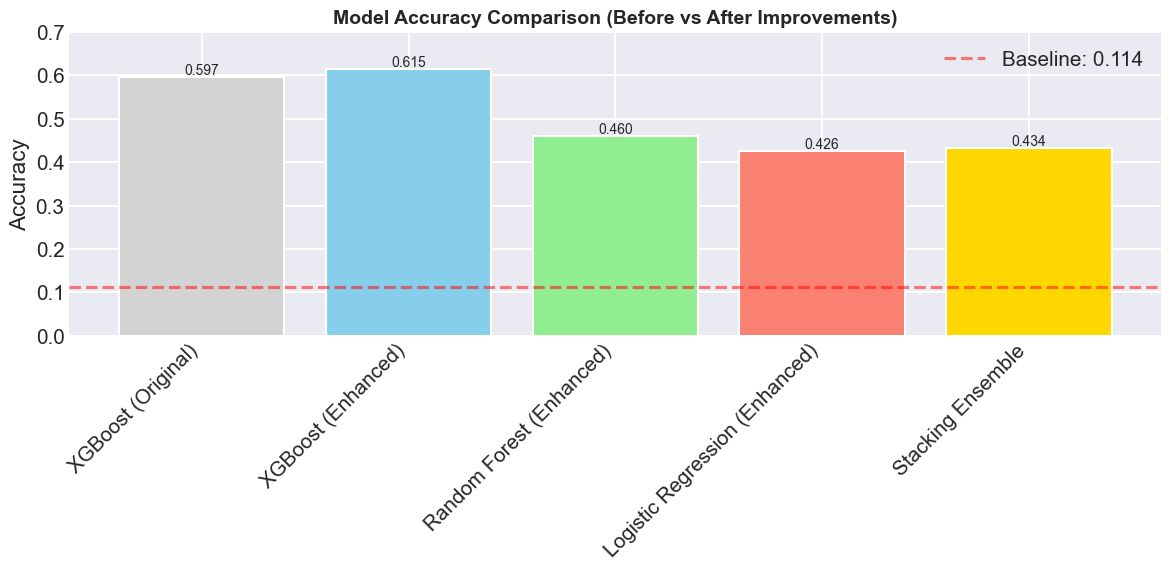

In [355]:
# Visual comparison
plt.figure(figsize=(12, 6))
models = comparison_df['Model']
accuracies = comparison_df['Accuracy']

bars = plt.bar(range(len(models)), accuracies, color=['lightgray', 'skyblue', 'lightgreen', 'salmon', 'gold'])
plt.xticks(range(len(models)), models, rotation=45, ha='right')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison (Before vs After Improvements)', fontsize=14, fontweight='bold')
plt.ylim([0, 0.7])
plt.axhline(y=accuracy_dummy, color='red', linestyle='--', alpha=0.5, label=f'Baseline: {accuracy_dummy:.3f}')
plt.legend()

# Add value labels
for bar, acc in zip(bars, accuracies):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.005,
            f'{acc:.3f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()